# 測試資料 


## boston-側連續數值演算法


In [82]:
from sklearn import datasets
from sklearn.cross_validation import train_test_split
boston=datasets.load_boston()
X=boston.data
Y=boston.target
#將資料分成訓練、測試集 其中測試集佔三成
XX_train, XX_test, YY_train, YY_test =train_test_split(X,Y,test_size=0.3,random_state=1)

## iris-測分類演算法用

In [83]:
iris = datasets.load_iris()
xx=iris.data
typeY=iris.target
from sklearn.cross_validation import train_test_split
#將資料分成訓練、測試集 其中測試集佔三成
xx_train, xx_test, Y_train, Y_test =train_test_split(xx,typeY,test_size=0.3,random_state=1)

# 載入資料

In [100]:
import pymongo
client=pymongo.MongoClient('192.168.1.113',27017,username="j122085",password="850605")
db=client.rawData
print(db.collection_names())
collection=db.wowprimediendata
# wowDatas=list(collection.find({"ADGC_weekday":{"$gte":0},"avgDailyNet":{"$gte":0},"costPower_Analyze":{"$gte":0}}))
wowDatas=list(collection.find({"ADGC_weekday":{"$gte":0},
                               "avgDailyNet":{"$gte":0},
                               "costPower_Analyze":{"$gte":0},
                               "areaRadius_Analyze":500}))

['MRTinfo', 'Watsons', 'pxmart', 'busData', 'HRdata104', 'info3Store', 'wowprimediendata', 'info591', 'departmentStore', 'websites591', 'carrefour', 'taiwanInfo', 'smallStyleCount', 'addressCoordinate', 'Nhuman', 'taiwanInfoStoneTwo', 'ipeenWebsite', 'taiwanInfoHot7', 'bigStyleCount', 'ipeenInfo', 'conStore', 'CostPower', 'infoClinic']


In [107]:
wowDatas=[i for i in wowDatas if i['NcostData_Analyze']>1 
          and "家樂" not in i['StoreName'] 
          and "大潤" not in i['StoreName']
          and "巨城" not in i['StoreName']
          and "大魯閣" not in i['StoreName']
          and "新光" not in i['StoreName']
          and "愛買" not in i['StoreName']
          and "大買家" not in i['StoreName']]

In [108]:
len(wowDatas)

30

In [109]:
wowDatas[5]

{'ADGC_holiday': 334,
 'ADGC_weekday': 189,
 'Address': '高雄市楠梓區慶昌里後昌路622號',
 'AreaManager': '陳紀妍',
 'Called': '石二鍋',
 'CareerName': '石二鍋事業處',
 'CareerNo': '112',
 'Chef': '陳鈺宸',
 'CloseDate': 'None',
 'CodeId': 'E',
 'CorporationId': '53013861',
 'Corporation_ch': '石二鍋高雄後昌分公司',
 'CreateDate': '2018-05-02 16:06:18.610000',
 'ItemName': '百貨點',
 'Manager': '王益珊',
 'NMRT_Analyze': 0,
 'NbusStation_Analyze': 4,
 'Ncarrefour_Analyze': 0,
 'Nclinic_Analyze': 9,
 'NconStore_Analyze': 2,
 'NcostData_Analyze': 2,
 'Ndabu_Analyze': 0,
 'Ndien_Analyze': 21,
 'Nhuman_Analyze': 6496,
 'Njob_Analyze': 2,
 'Nken_Analyze': 0,
 'Nmc_Analyze': 0,
 'Npxmart_Analyze': 0,
 'NsimCostDien': 4,
 'Nstar_Analyze': 0,
 'NtStore_Analyze': 0,
 'Nwa_Analyze': 0,
 'Nwatson_Analyze': 1,
 'Phone': '07-3625799',
 'PlaceNo': '10',
 'StoreName': '高雄後昌',
 'StoreNo': '11211',
 '_id': '11211',
 'areaRadius_Analyze': 500,
 'avgCost_Analyze': 62.0,
 'avgDailyCustomer': 234,
 'avgDailyMeal': 212,
 'avgDailyNet': 55292,
 'avgSal

In [110]:
import numpy as np
import pandas as pd
df=pd.DataFrame(wowDatas)
df.salary = df.avgDailyCustomer.astype(float)                   #traform into float type
df.working = df.avgDailyNet.astype(float)                 #traform into float type
X = df[['costPower_Analyze','Nhuman_Analyze',"NsimCostDien",
        'NbusStation_Analyze','NconStore_Analyze','Nstar_Analyze',
        'Nmc_Analyze', 'Nken_Analyze','Nwa_Analyze',
        'Nwatson_Analyze','Npxmart_Analyze','Ncarrefour_Analyze','Nstar_Analyze','Nclinic_Analyze']].values                   #tranform DataFrame to ndarray Matrix  為了predict輸入的方式
# xx=X
#將每個欄位的數值都變成0-1(除以最大的數做正規化、並只留下該數值List) 
# x=[]
# for i in range(len(X.T)):
#     x.append(X.T[i]/max(X.T[i]))

#用zscore正規化
x=[]
def zscore(x, axis = None):
    x=np.array(x)
    xmean = x.mean(axis=axis, keepdims=True)
    xstd  = np.std(x, axis=axis, keepdims=True)
    zscore = (x-xmean)/xstd
    return zscore    

for i in range(len(X.T)):
    x.append(zscore(X.T[i]))

x=np.array(x)
xx=x.T

Y=df['ADGC_weekday'].values


#分類
Calls=set(i["Called"] for i in wowDatas)
for Call in Calls:
    mean=np.mean([i["ADGC_weekday"] for i in wowDatas if i["Called"]==Call and 'ADGC_weekday' in i])
    if not np.isnan(mean):
        for j in wowDatas:
            if j["Called"]==Call and 'ADGC_weekday' in j:
                if j["ADGC_weekday"]>mean*1.15:
                    j['type']=0#"good"
                elif j["ADGC_weekday"]<mean*0.85:
                    j['type']=2#"bad"
                else:
                    j['type']=1#"normal"
            if 'avgDailyCustomer' in j:
                aC=j["avgDailyNet"]/j["avgDailyCustomer"]
                if aC<400:
                    j['typeP']="低"
                elif aC<800:
                    j['typeP']="中高"
                else:
                    j['typeP']="高"
                    
typeY= np.array([i['type'] for i in wowDatas if 'NbusStation_Analyze' in i and 'ADGC_weekday' in i and 'costPower_Analyze' in i
            ])

# xx為zscore正規化資料 
# X為原始資料

#### 都為262筆8維度

# Y為平均來客數>>(訓練預測數值)
# typeY為店家來客數表現>>(訓練預測類型)

In [111]:
xx.shape,X.shape

((30, 14), (30, 14))

In [112]:
Y.shape,Y

((30,), array([162, 180, 146, 201, 164, 189, 225, 280, 269, 204, 232, 298, 159,
        307, 253, 252, 246, 143, 212, 199, 289, 389, 238, 251, 219, 335,
        385, 152, 112, 124], dtype=int64))

In [113]:
typeY.shape,typeY

((30,),
 array([2, 2, 2, 2, 2, 2, 1, 0, 1, 1, 1, 0, 2, 0, 1, 1, 1, 2, 1, 2, 0, 0,
        1, 1, 1, 0, 0, 0, 1, 1]))

# 表現好的店家資料(GoodData)
#### newDataXG為原始資料 newDataxxG為正規化後的資料

In [114]:
# bestData="""74	247984	9	89	8	6	1	2
# 52	137707	10	78	0	2	0	0
# 76	355419	10	287	31	15	5	1
# 54	382333	16	203	9	4	2	3
# 54	286210	14	136	0	2	2	0
# 77	238522	10	96	8	7	1	2
# 57	229368	28	122	2	4	4	0
# 52	99568	0	45	3	5	2	0
# 56	365344	8	184	9	6	3	3
# 63	282141	22	187	16	15	2	1"""

# newDataXG=np.array([[int(j)for j in i.split("\t")] for i in bestData.split('\n')])

# newDataxxG=[]
# for i in range(len(newDataXG.T)):
#     newDataxxG.append(zscore(newDataXG.T[i]))
# newDataxxG=np.array(newDataxxG).T

# YG=np.array([int(s) for s in """389
# 393
# 394
# 397
# 399
# 414
# 424
# 430
# 460
# 512""".split("\n")])

# 表現差的店家資料(BadData)
#### newDataXB為原始資料 newDataxxB為正規化後的資料



In [115]:
# badData="""56	178949	12	125	5	8	5	3
# 70	353804	11	252	33	14	4	2
# 64	233683	13	154	11	7	3	1
# 67	373797	11	229	34	16	2	3
# 60	185182	42	134	4	7	4	1
# 52	102316	0	49	3	5	2	0
# 51	106274	7	39	1	2	2	0
# 65	342102	20	171	13	12	3	2
# 52	292044	8	124	8	6	1	0
# 58	185640	39	132	4	6	3	1"""


# newDataXB=np.array([[int(j)for j in i.split("\t")] for i in badData.split('\n')])

# newDataxxB=[]
# for i in range(len(newDataXB.T)):
#     newDataxxB.append(zscore(newDataXB.T[i]))
# newDataxxB=np.array(newDataxxB).T
# YB=np.array([int(s) for s in """81
# 87
# 93
# 95
# 96
# 97
# 98
# 98
# 101
# 104""".split("\n")])

# ====================預測數值====================

In [116]:
from sklearn.cross_validation import train_test_split
XX_train, XX_test, YY_train, YY_test =train_test_split(X,Y,test_size=0.3,random_state=1)

In [117]:
#畫圖用
import matplotlib.pyplot as plt
def plotPaint(predict,Y,R=0,title=""):
    plt.scatter(predict,Y,s=2)
    if R==1:
        plt.plot(predict, predict, 'ro')
#         plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=2)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Measured')
    plt.show()

# 引入sklearn模型

# 試跑LinearRegression

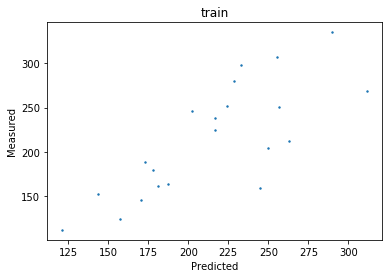

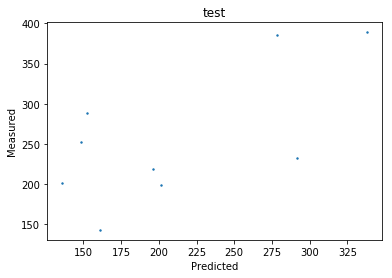

In [188]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(XX_train, YY_train)
# features="消費力	人口數	公車站數	四大超商數	星巴克數	麥當勞數	肯德基數	瓦城數".split("\t")

# print("參數")
# for i,j in zip(features,lm.coef_):
#     print(i,j)

    
    
predict=lm.predict(XX_train)
plotPaint(predict,YY_train,title="train")
predict=lm.predict(XX_test)
plotPaint(predict,YY_test,title="test")

In [191]:
error=lm.predict(XX_train).reshape([len(XX_train)])-np.array(YY_train)
np.average(error**2)**(1/2)

38.85057717390966

In [192]:
error=lm.predict(XX_test).reshape([len(XX_test)])-np.array(YY_test)
np.average(error**2)**(1/2)

76.09475969879868

In [119]:
# predicted_sales = lm.predict(newDataXG)
# print("好店家預測")
# print(predicted_sales)

# predicted_sales = lm.predict(newDataXB)
# print("差店家預測")
# print(predicted_sales)

# 試跑SVR

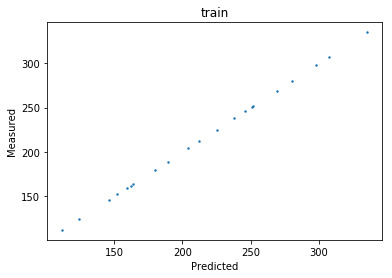

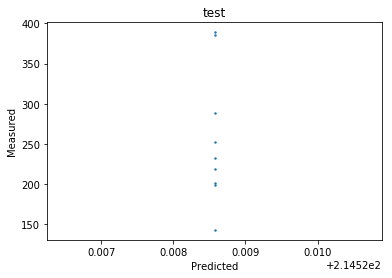

In [185]:

from sklearn import datasets
from sklearn.svm import SVR
import matplotlib.pyplot as plt
clf = SVR(kernel='rbf', C=1e3, gamma=0.1)
clf.fit(XX_train, YY_train)
# predicted_sales = clf.predict(newDataXG)
# print("好店家預測")
# print(predicted_sales)

# predicted_sales = clf.predict(newDataXB)
# print("差店家預測")
# print(predicted_sales)

predict=clf.predict(XX_train)
plotPaint(predict,YY_train,title="train")
predict=clf.predict(XX_test)
plotPaint(predict,YY_test,title="test")

In [186]:
error=clf.predict(XX_train).reshape([len(XX_train)])-np.array(YY_train)
np.average(error**2)**(1/2)

0.10002200345189746

In [187]:
error=clf.predict(XX_test).reshape([len(XX_test)])-np.array(YY_test)
np.average(error**2)**(1/2)

89.68622564415779

In [121]:
# predict=clf.predict(newDataXB)
# plotPaint(predict,YB,R=1)

In [122]:
# predict=clf.predict(newDataXG)
# plotPaint(predict,YG,R=1)

In [123]:
# TryData="""63	333451	13	148	10	8	2	2
# 62	205551	12	127	2	5	3	1
# 58	174562	26	128	4	6	3	1
# 72	137555	12	100	4	9	1	1
# 79	223146	12	128	11	12	2	2
# 63	282141	22	187	16	15	2	1
# 52	157180	4	83	5	4	2	1
# 71	128373	8	52	1	3	3	0"""

# #"消費力	人口數	公車站數	四大超商數	星巴克數	麥當勞數	肯德基數	瓦城數"
# newDataXTry=np.array([[int(j) for j in i.split("\t")] for i in TryData.split('\n')])


# newDataxxTry=[]
# for i in range(len(newDataXTry.T)):
#     newDataxxTry.append(zscore(newDataXTry.T[i]))
# newDataxxTry=np.array(newDataxxTry).T


# clf.predict(newDataXTry)


# 引入keras模型

In [124]:
# from keras.datasets import mnist
from keras.models import Sequential # 序慣模型(可一層一層加入)
from keras.layers.core import Dense,Activation # 緊密層、啟動函數
from keras.layers import Dropout #減少overfitting的方法
from keras.utils import np_utils #one-hot 僅分類時使用

# 淺層神經網路(NN)

In [125]:
input_size=len(XX_train[0])#feature數量
batch_size=50#每批樣本大小
epochs=500#處理幾輪

model=Sequential()  #定義model
model.add(Dense(40,input_dim=input_size)) #加入層(緊密層) 產出個數40 輸入個數8 次元
model.add(Activation('relu')) #啟動函數
# model.add(Dense(3))  
# model.add(Activation('linear')) #啟動函數
model.add(Dense(1))  
model.add(Activation('linear')) #啟動函數

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
train_history=model.fit(XX_train,YY_train,batch_size=batch_size,epochs=epochs,validation_split=0.2,verbose=1)
#劃出準確度歷程
import matplotlib.pyplot as plt
def show_tarin_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel("Epoch")
    plt.legend(['train','validation'],loc="upper left")
    plt.show()
# show_tarin_history(train_history,'loss','loss')

Train on 16 samples, validate on 5 samples
Epoch 1/500
16/16 [==============================] - 0s 21ms/step - loss: 33079808.0000 - mean_absolute_error: 5078.9404 - val_loss: 24222096.0000 - val_mean_absolute_error: 4554.0288
Epoch 2/500
16/16 [==============================] - 0s 188us/step - loss: 31189296.0000 - mean_absolute_error: 4932.2285 - val_loss: 22808684.0000 - val_mean_absolute_error: 4419.8169
Epoch 3/500
16/16 [==============================] - 0s 188us/step - loss: 29356584.0000 - mean_absolute_error: 4785.6929 - val_loss: 21440224.0000 - val_mean_absolute_error: 4285.8481
Epoch 4/500
16/16 [==============================] - 0s 188us/step - loss: 27582550.0000 - mean_absolute_error: 4639.4233 - val_loss: 20117344.0000 - val_mean_absolute_error: 4152.2119
Epoch 5/500
16/16 [==============================] - 0s 188us/step - loss: 25868014.0000 - mean_absolute_error: 4493.5161 - val_loss: 18840554.0000 - val_mean_absolute_error: 4018.9954
Epoch 6/500
16/16 [==============

Epoch 46/500
16/16 [==============================] - 0s 125us/step - loss: 19970.9785 - mean_absolute_error: 124.2984 - val_loss: 13874.3467 - val_mean_absolute_error: 109.1834
Epoch 47/500
16/16 [==============================] - 0s 125us/step - loss: 11295.6143 - mean_absolute_error: 89.9429 - val_loss: 8172.2671 - val_mean_absolute_error: 80.2653
Epoch 48/500
16/16 [==============================] - 0s 188us/step - loss: 7318.3076 - mean_absolute_error: 63.3794 - val_loss: 5520.1533 - val_mean_absolute_error: 65.8616
Epoch 49/500
16/16 [==============================] - 0s 188us/step - loss: 7021.7461 - mean_absolute_error: 66.7078 - val_loss: 5221.8228 - val_mean_absolute_error: 58.3169
Epoch 50/500
16/16 [==============================] - 0s 125us/step - loss: 9504.2080 - mean_absolute_error: 87.1340 - val_loss: 6667.5063 - val_mean_absolute_error: 72.9839
Epoch 51/500
16/16 [==============================] - 0s 250us/step - loss: 13977.6680 - mean_absolute_error: 108.0173 - val_

Epoch 93/500
16/16 [==============================] - 0s 125us/step - loss: 6783.8325 - mean_absolute_error: 60.2633 - val_loss: 6986.6709 - val_mean_absolute_error: 75.3152
Epoch 94/500
16/16 [==============================] - 0s 125us/step - loss: 6852.8076 - mean_absolute_error: 60.5323 - val_loss: 7296.2783 - val_mean_absolute_error: 76.7273
Epoch 95/500
16/16 [==============================] - 0s 125us/step - loss: 6946.5225 - mean_absolute_error: 61.0371 - val_loss: 7587.8232 - val_mean_absolute_error: 77.9689
Epoch 96/500
16/16 [==============================] - 0s 188us/step - loss: 7054.1387 - mean_absolute_error: 61.5803 - val_loss: 7852.0342 - val_mean_absolute_error: 79.0324
Epoch 97/500
16/16 [==============================] - 0s 125us/step - loss: 7165.1860 - mean_absolute_error: 62.0459 - val_loss: 8085.7891 - val_mean_absolute_error: 79.9315
Epoch 98/500
16/16 [==============================] - 0s 125us/step - loss: 7272.6240 - mean_absolute_error: 63.0314 - val_loss: 8

Epoch 140/500
16/16 [==============================] - 0s 125us/step - loss: 6758.6104 - mean_absolute_error: 62.6262 - val_loss: 6019.7080 - val_mean_absolute_error: 69.9383
Epoch 141/500
16/16 [==============================] - 0s 125us/step - loss: 6758.3857 - mean_absolute_error: 62.6283 - val_loss: 6021.4751 - val_mean_absolute_error: 69.9506
Epoch 142/500
16/16 [==============================] - 0s 125us/step - loss: 6757.6641 - mean_absolute_error: 62.6142 - val_loss: 6025.5659 - val_mean_absolute_error: 69.9785
Epoch 143/500
16/16 [==============================] - 0s 188us/step - loss: 6756.5625 - mean_absolute_error: 62.5857 - val_loss: 6031.8696 - val_mean_absolute_error: 70.0212
Epoch 144/500
16/16 [==============================] - 0s 188us/step - loss: 6755.1172 - mean_absolute_error: 62.5447 - val_loss: 6040.0195 - val_mean_absolute_error: 70.0758
Epoch 145/500
16/16 [==============================] - 0s 125us/step - loss: 6753.4229 - mean_absolute_error: 62.4924 - val_l

Epoch 187/500
16/16 [==============================] - 0s 125us/step - loss: 6720.2603 - mean_absolute_error: 60.9767 - val_loss: 6279.0547 - val_mean_absolute_error: 71.5845
Epoch 188/500
16/16 [==============================] - 0s 125us/step - loss: 6719.8237 - mean_absolute_error: 60.9919 - val_loss: 6275.5576 - val_mean_absolute_error: 71.5638
Epoch 189/500
16/16 [==============================] - 0s 125us/step - loss: 6719.4019 - mean_absolute_error: 61.0065 - val_loss: 6272.2036 - val_mean_absolute_error: 71.5442
Epoch 190/500
16/16 [==============================] - 0s 125us/step - loss: 6718.9678 - mean_absolute_error: 61.0206 - val_loss: 6269.0273 - val_mean_absolute_error: 71.5256
Epoch 191/500
16/16 [==============================] - 0s 125us/step - loss: 6718.5713 - mean_absolute_error: 61.0341 - val_loss: 6265.9468 - val_mean_absolute_error: 71.5074
Epoch 192/500
16/16 [==============================] - 0s 125us/step - loss: 6718.1455 - mean_absolute_error: 61.0464 - val_l

Epoch 234/500
16/16 [==============================] - 0s 188us/step - loss: 6700.3359 - mean_absolute_error: 61.0022 - val_loss: 6242.3301 - val_mean_absolute_error: 71.3753
Epoch 235/500
16/16 [==============================] - 0s 188us/step - loss: 6699.8965 - mean_absolute_error: 61.0008 - val_loss: 6241.7993 - val_mean_absolute_error: 71.3724
Epoch 236/500
16/16 [==============================] - 0s 188us/step - loss: 6699.4727 - mean_absolute_error: 60.9998 - val_loss: 6241.2705 - val_mean_absolute_error: 71.3695
Epoch 237/500
16/16 [==============================] - 0s 188us/step - loss: 6699.0127 - mean_absolute_error: 60.9982 - val_loss: 6240.7002 - val_mean_absolute_error: 71.3664
Epoch 238/500
16/16 [==============================] - 0s 188us/step - loss: 6698.5806 - mean_absolute_error: 60.9971 - val_loss: 6240.0703 - val_mean_absolute_error: 71.3627
Epoch 239/500
16/16 [==============================] - 0s 188us/step - loss: 6698.1343 - mean_absolute_error: 60.9963 - val_l

Epoch 281/500
16/16 [==============================] - 0s 188us/step - loss: 6678.5322 - mean_absolute_error: 60.9405 - val_loss: 6215.2100 - val_mean_absolute_error: 71.2238
Epoch 282/500
16/16 [==============================] - 0s 188us/step - loss: 6678.0356 - mean_absolute_error: 60.9386 - val_loss: 6214.7490 - val_mean_absolute_error: 71.2213
Epoch 283/500
16/16 [==============================] - 0s 250us/step - loss: 6677.5742 - mean_absolute_error: 60.9369 - val_loss: 6214.1904 - val_mean_absolute_error: 71.2182
Epoch 284/500
16/16 [==============================] - 0s 188us/step - loss: 6677.0718 - mean_absolute_error: 60.9349 - val_loss: 6213.6445 - val_mean_absolute_error: 71.2152
Epoch 285/500
16/16 [==============================] - 0s 188us/step - loss: 6676.5674 - mean_absolute_error: 60.9330 - val_loss: 6213.1162 - val_mean_absolute_error: 71.2122
Epoch 286/500
16/16 [==============================] - 0s 125us/step - loss: 6676.0908 - mean_absolute_error: 60.9316 - val_l

Epoch 328/500
16/16 [==============================] - 0s 188us/step - loss: 6654.9072 - mean_absolute_error: 60.8589 - val_loss: 6188.2188 - val_mean_absolute_error: 71.0734
Epoch 329/500
16/16 [==============================] - 0s 125us/step - loss: 6654.3657 - mean_absolute_error: 60.8570 - val_loss: 6187.6377 - val_mean_absolute_error: 71.0702
Epoch 330/500
16/16 [==============================] - 0s 125us/step - loss: 6653.8438 - mean_absolute_error: 60.8551 - val_loss: 6187.0508 - val_mean_absolute_error: 71.0669
Epoch 331/500
16/16 [==============================] - 0s 125us/step - loss: 6653.3271 - mean_absolute_error: 60.8534 - val_loss: 6186.4131 - val_mean_absolute_error: 71.0634
Epoch 332/500
16/16 [==============================] - 0s 125us/step - loss: 6652.7871 - mean_absolute_error: 60.8515 - val_loss: 6185.8423 - val_mean_absolute_error: 71.0602
Epoch 333/500
16/16 [==============================] - 0s 188us/step - loss: 6652.2793 - mean_absolute_error: 60.8497 - val_l

Epoch 375/500
16/16 [==============================] - 0s 125us/step - loss: 6629.6475 - mean_absolute_error: 60.7705 - val_loss: 6159.2871 - val_mean_absolute_error: 70.9120
Epoch 376/500
16/16 [==============================] - 0s 125us/step - loss: 6629.0903 - mean_absolute_error: 60.7686 - val_loss: 6158.6265 - val_mean_absolute_error: 70.9082
Epoch 377/500
16/16 [==============================] - 0s 313us/step - loss: 6628.5498 - mean_absolute_error: 60.7668 - val_loss: 6157.9985 - val_mean_absolute_error: 70.9046
Epoch 378/500
16/16 [==============================] - 0s 188us/step - loss: 6627.9814 - mean_absolute_error: 60.7646 - val_loss: 6157.3555 - val_mean_absolute_error: 70.9011
Epoch 379/500
16/16 [==============================] - 0s 125us/step - loss: 6627.4458 - mean_absolute_error: 60.7628 - val_loss: 6156.7451 - val_mean_absolute_error: 70.8977
Epoch 380/500
16/16 [==============================] - 0s 188us/step - loss: 6626.9043 - mean_absolute_error: 60.7609 - val_l

Epoch 422/500
16/16 [==============================] - 0s 125us/step - loss: 6602.9590 - mean_absolute_error: 60.6761 - val_loss: 6128.4775 - val_mean_absolute_error: 70.7394
Epoch 423/500
16/16 [==============================] - 0s 188us/step - loss: 6602.3945 - mean_absolute_error: 60.6742 - val_loss: 6127.8076 - val_mean_absolute_error: 70.7356
Epoch 424/500
16/16 [==============================] - 0s 188us/step - loss: 6601.8076 - mean_absolute_error: 60.6718 - val_loss: 6127.1587 - val_mean_absolute_error: 70.7319
Epoch 425/500
16/16 [==============================] - 0s 188us/step - loss: 6601.2129 - mean_absolute_error: 60.6696 - val_loss: 6126.4688 - val_mean_absolute_error: 70.7280
Epoch 426/500
16/16 [==============================] - 0s 188us/step - loss: 6600.6216 - mean_absolute_error: 60.6673 - val_loss: 6125.7632 - val_mean_absolute_error: 70.7241
Epoch 427/500
16/16 [==============================] - 0s 188us/step - loss: 6600.0645 - mean_absolute_error: 60.6654 - val_l

Epoch 469/500
16/16 [==============================] - 0s 125us/step - loss: 6574.9624 - mean_absolute_error: 60.5748 - val_loss: 6096.0903 - val_mean_absolute_error: 70.5572
Epoch 470/500
16/16 [==============================] - 0s 125us/step - loss: 6574.3477 - mean_absolute_error: 60.5725 - val_loss: 6095.3877 - val_mean_absolute_error: 70.5533
Epoch 471/500
16/16 [==============================] - 0s 188us/step - loss: 6573.7559 - mean_absolute_error: 60.5704 - val_loss: 6094.6548 - val_mean_absolute_error: 70.5491
Epoch 472/500
16/16 [==============================] - 0s 125us/step - loss: 6573.1270 - mean_absolute_error: 60.5680 - val_loss: 6093.9756 - val_mean_absolute_error: 70.5453
Epoch 473/500
16/16 [==============================] - 0s 125us/step - loss: 6572.5254 - mean_absolute_error: 60.5658 - val_loss: 6093.2563 - val_mean_absolute_error: 70.5412
Epoch 474/500
16/16 [==============================] - 0s 188us/step - loss: 6571.9189 - mean_absolute_error: 60.5637 - val_l

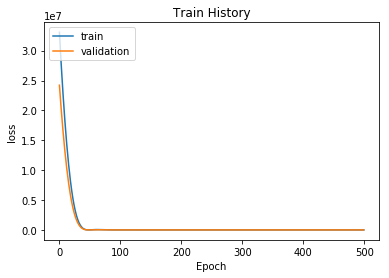

In [126]:
show_tarin_history(train_history,'loss','val_loss')

In [127]:
error=model.predict(XX_train).reshape([len(XX_train)])-np.array(YY_train)
np.average(error**2)**(1/2)

80.25324490663803

In [128]:
error=model.predict(XX_test).reshape([len(XX_test)])-np.array(YY_test)
np.average(error**2)**(1/2)

89.58980012328833

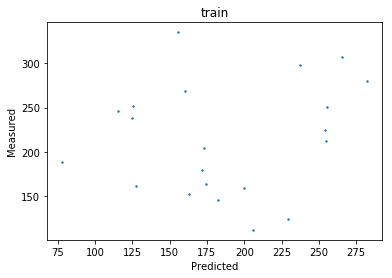

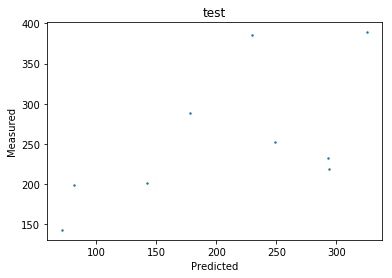

In [129]:
predict=model.predict(XX_train)
plotPaint(predict,YY_train,title="train")
predict=model.predict(XX_test)
plotPaint(predict,YY_test,title="test")

In [130]:
# predicted_sales = model.predict(newDataxxG)
# print("好店家預測")
# print(predicted_sales)
# predicted_sales = model.predict(newDataxxB)
# print("差店家預測")
# print(predicted_sales)
# predict=model.predict(newDataxxG)
# plotPaint(predict,YG,R=1)
# predict=model.predict(newDataxxB)
# plotPaint(predict,YB,R=1)

# 多層(DNN)

In [131]:
input_size=len(XX_train[0])#feature數量
batch_size=50#每批樣本大小
# epochs=5000#處理幾輪
epochs=1500#處理幾輪

model=Sequential()  #定義model
model.add(Dense(40,input_dim=input_size)) #加入層(緊密層) 產出個數40 輸入個數8 次元
model.add(Activation('relu')) #啟動函數
model.add(Dense(200)) 
model.add(Activation('relu')) 
model.add(Dense(200)) 
model.add(Dropout(0.3)) 
model.add(Activation('relu')) 
model.add(Dense(250)) 
model.add(Activation('relu')) 
for i in range(20):
    model.add(Dense(200-i*8)) 
    model.add(Activation('relu')) 
model.add(Dense(20)) 
# model.add(Dense(50)) 
model.add(Activation('relu'))
model.add(Dropout(0.2)) 

model.add(Dense(1))  
model.add(Activation('linear')) #啟動函數

In [132]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 40)                600       
_________________________________________________________________
activation_36 (Activation)   (None, 40)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 200)               8200      
_________________________________________________________________
activation_37 (Activation)   (None, 200)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 200)               40200     
_________________________________________________________________
dropout_8 (Dropout)          (None, 200)               0         
_________________________________________________________________
activation_38 (Activation)   (None, 200)               0         
__________

In [133]:
#loss成本函數mse(均方差)  optimizer最佳化工具adam(會自動調整學習速率、並繼承上一步的方法) metrics性能評估方法()
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
# model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
# model.compile(loss="MSE",metrics=['accuracy'],optimizer='sgd')

In [134]:
#訓練開始 xx為feature Y為label  batch_size為每次放多少進去 epochs為處理幾輪 validation_split為抽多少樣本來驗證 verbose=1為每次顯示
train_history=model.fit(XX_train,YY_train,batch_size=batch_size,epochs=epochs,validation_split=0.2,verbose=1)
# train_history=model.fit(xx,Y,batch_size=batch_size,epochs=epochs,verbose=1)

Train on 16 samples, validate on 5 samples
Epoch 1/1500
16/16 [==============================] - 1s 81ms/step - loss: 48448.5664 - mean_absolute_error: 210.6412 - val_loss: 49789.3359 - val_mean_absolute_error: 217.2049
Epoch 2/1500
16/16 [==============================] - 0s 625us/step - loss: 45040.2109 - mean_absolute_error: 202.7350 - val_loss: 36756.4531 - val_mean_absolute_error: 184.9533
Epoch 3/1500
16/16 [==============================] - 0s 813us/step - loss: 30615.1777 - mean_absolute_error: 163.6228 - val_loss: 9745.4160 - val_mean_absolute_error: 88.6626
Epoch 4/1500
16/16 [==============================] - 0s 688us/step - loss: 14500.0967 - mean_absolute_error: 103.9683 - val_loss: 8467.1748 - val_mean_absolute_error: 77.2878
Epoch 5/1500
16/16 [==============================] - 0s 688us/step - loss: 19358.7383 - mean_absolute_error: 119.3987 - val_loss: 20523.1934 - val_mean_absolute_error: 131.3344
Epoch 6/1500
16/16 [==============================] - 0s 750us/step - lo

Epoch 47/1500
16/16 [==============================] - 0s 813us/step - loss: 13504.7520 - mean_absolute_error: 86.1864 - val_loss: 15640.4688 - val_mean_absolute_error: 108.4796
Epoch 48/1500
16/16 [==============================] - 0s 750us/step - loss: 12637.8926 - mean_absolute_error: 85.7084 - val_loss: 14102.9893 - val_mean_absolute_error: 104.5536
Epoch 49/1500
16/16 [==============================] - 0s 688us/step - loss: 13739.3555 - mean_absolute_error: 89.8258 - val_loss: 11600.8359 - val_mean_absolute_error: 96.8074
Epoch 50/1500
16/16 [==============================] - 0s 688us/step - loss: 14234.7559 - mean_absolute_error: 93.9047 - val_loss: 12452.3389 - val_mean_absolute_error: 99.6974
Epoch 51/1500
16/16 [==============================] - 0s 750us/step - loss: 11942.1426 - mean_absolute_error: 80.5635 - val_loss: 13153.9951 - val_mean_absolute_error: 101.8603
Epoch 52/1500
16/16 [==============================] - 0s 750us/step - loss: 12368.8828 - mean_absolute_error: 8

Epoch 94/1500
16/16 [==============================] - 0s 813us/step - loss: 16565.7363 - mean_absolute_error: 111.5593 - val_loss: 13116.6768 - val_mean_absolute_error: 101.7114
Epoch 95/1500
16/16 [==============================] - 0s 688us/step - loss: 13178.0234 - mean_absolute_error: 85.6345 - val_loss: 15429.6719 - val_mean_absolute_error: 107.9023
Epoch 96/1500
16/16 [==============================] - 0s 625us/step - loss: 12705.5078 - mean_absolute_error: 87.0164 - val_loss: 13792.9248 - val_mean_absolute_error: 103.6491
Epoch 97/1500
16/16 [==============================] - 0s 688us/step - loss: 14835.5703 - mean_absolute_error: 92.3437 - val_loss: 12046.1709 - val_mean_absolute_error: 98.3364
Epoch 98/1500
16/16 [==============================] - 0s 688us/step - loss: 14554.4336 - mean_absolute_error: 98.3274 - val_loss: 11318.8828 - val_mean_absolute_error: 95.7620
Epoch 99/1500
16/16 [==============================] - 0s 813us/step - loss: 14709.9551 - mean_absolute_error: 

Epoch 140/1500
16/16 [==============================] - 0s 688us/step - loss: 12095.5059 - mean_absolute_error: 93.2847 - val_loss: 15710.1074 - val_mean_absolute_error: 109.0951
Epoch 141/1500
16/16 [==============================] - 0s 750us/step - loss: 13853.6494 - mean_absolute_error: 95.5651 - val_loss: 21658.6699 - val_mean_absolute_error: 136.1579
Epoch 142/1500
16/16 [==============================] - 0s 688us/step - loss: 20644.8867 - mean_absolute_error: 117.4312 - val_loss: 23174.9961 - val_mean_absolute_error: 142.0214
Epoch 143/1500
16/16 [==============================] - 0s 813us/step - loss: 16476.0254 - mean_absolute_error: 102.5324 - val_loss: 20015.4219 - val_mean_absolute_error: 129.4186
Epoch 144/1500
16/16 [==============================] - 0s 813us/step - loss: 16739.0000 - mean_absolute_error: 105.8783 - val_loss: 13158.2783 - val_mean_absolute_error: 101.7884
Epoch 145/1500
16/16 [==============================] - 0s 750us/step - loss: 11378.3848 - mean_absolu

Epoch 186/1500
16/16 [==============================] - 0s 688us/step - loss: 11637.6250 - mean_absolute_error: 80.4923 - val_loss: 14667.7441 - val_mean_absolute_error: 105.8776
Epoch 187/1500
16/16 [==============================] - 0s 688us/step - loss: 11977.9785 - mean_absolute_error: 82.2257 - val_loss: 14517.9746 - val_mean_absolute_error: 105.4901
Epoch 188/1500
16/16 [==============================] - 0s 813us/step - loss: 11914.1270 - mean_absolute_error: 81.8375 - val_loss: 11913.7578 - val_mean_absolute_error: 97.8431
Epoch 189/1500
16/16 [==============================] - 0s 750us/step - loss: 17899.4570 - mean_absolute_error: 107.7597 - val_loss: 10614.3721 - val_mean_absolute_error: 92.9863
Epoch 190/1500
16/16 [==============================] - 0s 688us/step - loss: 13575.8516 - mean_absolute_error: 93.7087 - val_loss: 10751.2129 - val_mean_absolute_error: 93.5507
Epoch 191/1500
16/16 [==============================] - 0s 813us/step - loss: 13353.4297 - mean_absolute_er

Epoch 232/1500
16/16 [==============================] - 0s 688us/step - loss: 15263.6133 - mean_absolute_error: 93.9197 - val_loss: 14138.3535 - val_mean_absolute_error: 104.4337
Epoch 233/1500
16/16 [==============================] - 0s 688us/step - loss: 14991.8496 - mean_absolute_error: 94.4451 - val_loss: 9530.3379 - val_mean_absolute_error: 87.8796
Epoch 234/1500
16/16 [==============================] - 0s 625us/step - loss: 12417.4727 - mean_absolute_error: 91.4779 - val_loss: 8112.3018 - val_mean_absolute_error: 72.6751
Epoch 235/1500
16/16 [==============================] - 0s 688us/step - loss: 18166.2695 - mean_absolute_error: 117.6212 - val_loss: 8776.4023 - val_mean_absolute_error: 82.9685
Epoch 236/1500
16/16 [==============================] - 0s 688us/step - loss: 17261.6641 - mean_absolute_error: 104.2820 - val_loss: 13820.2676 - val_mean_absolute_error: 103.5673
Epoch 237/1500
16/16 [==============================] - 0s 688us/step - loss: 14832.9609 - mean_absolute_erro

Epoch 278/1500
16/16 [==============================] - 0s 688us/step - loss: 11362.9648 - mean_absolute_error: 83.3241 - val_loss: 8725.8105 - val_mean_absolute_error: 82.7828
Epoch 279/1500
16/16 [==============================] - 0s 750us/step - loss: 11744.6641 - mean_absolute_error: 84.9624 - val_loss: 8465.3887 - val_mean_absolute_error: 80.4565
Epoch 280/1500
16/16 [==============================] - 0s 813us/step - loss: 14043.1738 - mean_absolute_error: 102.6713 - val_loss: 10295.0781 - val_mean_absolute_error: 91.6601
Epoch 281/1500
16/16 [==============================] - 0s 688us/step - loss: 14310.5781 - mean_absolute_error: 93.4118 - val_loss: 14573.0752 - val_mean_absolute_error: 105.4992
Epoch 282/1500
16/16 [==============================] - 0s 688us/step - loss: 13577.9092 - mean_absolute_error: 85.3770 - val_loss: 17612.7168 - val_mean_absolute_error: 118.9665
Epoch 283/1500
16/16 [==============================] - 0s 688us/step - loss: 14488.5371 - mean_absolute_erro

Epoch 324/1500
16/16 [==============================] - 0s 750us/step - loss: 14737.5156 - mean_absolute_error: 95.7140 - val_loss: 13535.8652 - val_mean_absolute_error: 102.6535
Epoch 325/1500
16/16 [==============================] - 0s 750us/step - loss: 11672.2461 - mean_absolute_error: 87.7568 - val_loss: 11418.1992 - val_mean_absolute_error: 96.0498
Epoch 326/1500
16/16 [==============================] - 0s 938us/step - loss: 12547.5391 - mean_absolute_error: 84.6170 - val_loss: 8806.1436 - val_mean_absolute_error: 83.6519
Epoch 327/1500
16/16 [==============================] - 0s 750us/step - loss: 13738.7373 - mean_absolute_error: 95.9423 - val_loss: 8302.8906 - val_mean_absolute_error: 79.2069
Epoch 328/1500
16/16 [==============================] - 0s 688us/step - loss: 12285.5088 - mean_absolute_error: 97.7386 - val_loss: 9395.2344 - val_mean_absolute_error: 87.3359
Epoch 329/1500
16/16 [==============================] - 0s 750us/step - loss: 11627.8828 - mean_absolute_error: 

Epoch 370/1500
16/16 [==============================] - 0s 688us/step - loss: 13118.8379 - mean_absolute_error: 87.0341 - val_loss: 17678.0508 - val_mean_absolute_error: 119.5290
Epoch 371/1500
16/16 [==============================] - 0s 688us/step - loss: 15136.1348 - mean_absolute_error: 93.1641 - val_loss: 19394.5176 - val_mean_absolute_error: 127.2128
Epoch 372/1500
16/16 [==============================] - 0s 750us/step - loss: 15614.1270 - mean_absolute_error: 100.4161 - val_loss: 18847.2930 - val_mean_absolute_error: 124.8326
Epoch 373/1500
16/16 [==============================] - 0s 688us/step - loss: 15055.5137 - mean_absolute_error: 103.8356 - val_loss: 15637.8232 - val_mean_absolute_error: 109.4656
Epoch 374/1500
16/16 [==============================] - 0s 688us/step - loss: 12921.3613 - mean_absolute_error: 91.6347 - val_loss: 10974.2646 - val_mean_absolute_error: 94.4116
Epoch 375/1500
16/16 [==============================] - 0s 688us/step - loss: 10911.2539 - mean_absolute

Epoch 416/1500
16/16 [==============================] - 0s 750us/step - loss: 14885.3340 - mean_absolute_error: 100.7938 - val_loss: 12997.0000 - val_mean_absolute_error: 100.9685
Epoch 417/1500
16/16 [==============================] - 0s 688us/step - loss: 13574.3467 - mean_absolute_error: 90.9150 - val_loss: 11207.4922 - val_mean_absolute_error: 95.2401
Epoch 418/1500
16/16 [==============================] - 0s 625us/step - loss: 12641.9814 - mean_absolute_error: 89.3998 - val_loss: 10080.2402 - val_mean_absolute_error: 90.8024
Epoch 419/1500
16/16 [==============================] - 0s 688us/step - loss: 11120.4717 - mean_absolute_error: 82.7116 - val_loss: 8682.7051 - val_mean_absolute_error: 83.2589
Epoch 420/1500
16/16 [==============================] - 0s 688us/step - loss: 15201.8398 - mean_absolute_error: 103.8230 - val_loss: 9208.4609 - val_mean_absolute_error: 86.5329
Epoch 421/1500
16/16 [==============================] - 0s 688us/step - loss: 10053.2217 - mean_absolute_erro

16/16 [==============================] - 0s 750us/step - loss: 13049.8057 - mean_absolute_error: 92.2864 - val_loss: 13834.7871 - val_mean_absolute_error: 103.1751
Epoch 463/1500
16/16 [==============================] - 0s 688us/step - loss: 11213.7012 - mean_absolute_error: 83.4599 - val_loss: 14002.7090 - val_mean_absolute_error: 103.6164
Epoch 464/1500
16/16 [==============================] - 0s 688us/step - loss: 12079.9922 - mean_absolute_error: 84.9521 - val_loss: 12892.6074 - val_mean_absolute_error: 100.5488
Epoch 465/1500
16/16 [==============================] - 0s 688us/step - loss: 10312.4980 - mean_absolute_error: 76.7094 - val_loss: 11559.6553 - val_mean_absolute_error: 96.3965
Epoch 466/1500
16/16 [==============================] - 0s 688us/step - loss: 12978.8906 - mean_absolute_error: 83.5438 - val_loss: 10419.5938 - val_mean_absolute_error: 92.2313
Epoch 467/1500
16/16 [==============================] - 0s 688us/step - loss: 14318.0605 - mean_absolute_error: 105.9549 -

16/16 [==============================] - 0s 688us/step - loss: 10380.0371 - mean_absolute_error: 74.1302 - val_loss: 12522.4551 - val_mean_absolute_error: 99.3299
Epoch 509/1500
16/16 [==============================] - 0s 625us/step - loss: 10906.5312 - mean_absolute_error: 75.4350 - val_loss: 11801.4219 - val_mean_absolute_error: 97.0959
Epoch 510/1500
16/16 [==============================] - 0s 625us/step - loss: 12516.8193 - mean_absolute_error: 89.5611 - val_loss: 10875.1465 - val_mean_absolute_error: 93.9310
Epoch 511/1500
16/16 [==============================] - 0s 688us/step - loss: 11143.0859 - mean_absolute_error: 82.7082 - val_loss: 10718.2812 - val_mean_absolute_error: 93.3518
Epoch 512/1500
16/16 [==============================] - 0s 688us/step - loss: 10688.7080 - mean_absolute_error: 80.8268 - val_loss: 10462.2090 - val_mean_absolute_error: 92.3775
Epoch 513/1500
16/16 [==============================] - 0s 688us/step - loss: 11944.2617 - mean_absolute_error: 95.9393 - val

16/16 [==============================] - 0s 688us/step - loss: 10316.6553 - mean_absolute_error: 79.9905 - val_loss: 12076.4482 - val_mean_absolute_error: 97.7318
Epoch 555/1500
16/16 [==============================] - 0s 688us/step - loss: 13669.3379 - mean_absolute_error: 97.0751 - val_loss: 12642.4365 - val_mean_absolute_error: 99.4049
Epoch 556/1500
16/16 [==============================] - 0s 750us/step - loss: 10922.5625 - mean_absolute_error: 80.8906 - val_loss: 12106.2129 - val_mean_absolute_error: 97.8076
Epoch 557/1500
16/16 [==============================] - 0s 688us/step - loss: 13198.1650 - mean_absolute_error: 98.6675 - val_loss: 12348.9189 - val_mean_absolute_error: 98.5325
Epoch 558/1500
16/16 [==============================] - 0s 750us/step - loss: 13779.0059 - mean_absolute_error: 89.9131 - val_loss: 12993.5781 - val_mean_absolute_error: 100.3794
Epoch 559/1500
16/16 [==============================] - 0s 625us/step - loss: 11553.5996 - mean_absolute_error: 78.6590 - va

Epoch 601/1500
16/16 [==============================] - 0s 750us/step - loss: 11778.2539 - mean_absolute_error: 79.7675 - val_loss: 17244.8320 - val_mean_absolute_error: 119.1901
Epoch 602/1500
16/16 [==============================] - 0s 750us/step - loss: 11326.9180 - mean_absolute_error: 79.9433 - val_loss: 16975.1445 - val_mean_absolute_error: 117.9642
Epoch 603/1500
16/16 [==============================] - 0s 813us/step - loss: 11831.4600 - mean_absolute_error: 84.3767 - val_loss: 14137.3809 - val_mean_absolute_error: 103.8865
Epoch 604/1500
16/16 [==============================] - 0s 750us/step - loss: 11092.6953 - mean_absolute_error: 80.2556 - val_loss: 10020.0820 - val_mean_absolute_error: 90.3966
Epoch 605/1500
16/16 [==============================] - 0s 750us/step - loss: 9525.2266 - mean_absolute_error: 75.5042 - val_loss: 7231.3032 - val_mean_absolute_error: 75.3049
Epoch 606/1500
16/16 [==============================] - 0s 688us/step - loss: 9361.3164 - mean_absolute_error

Epoch 647/1500
16/16 [==============================] - 0s 750us/step - loss: 14222.2715 - mean_absolute_error: 91.3886 - val_loss: 20110.5371 - val_mean_absolute_error: 132.1223
Epoch 648/1500
16/16 [==============================] - 0s 625us/step - loss: 16672.7344 - mean_absolute_error: 109.2732 - val_loss: 17856.9375 - val_mean_absolute_error: 122.8382
Epoch 649/1500
16/16 [==============================] - 0s 625us/step - loss: 14674.2900 - mean_absolute_error: 96.9524 - val_loss: 13103.7139 - val_mean_absolute_error: 99.7214
Epoch 650/1500
16/16 [==============================] - 0s 625us/step - loss: 10482.6025 - mean_absolute_error: 78.8081 - val_loss: 7923.9858 - val_mean_absolute_error: 81.0912
Epoch 651/1500
16/16 [==============================] - 0s 625us/step - loss: 9742.0439 - mean_absolute_error: 72.8240 - val_loss: 6205.0142 - val_mean_absolute_error: 65.6797
Epoch 652/1500
16/16 [==============================] - 0s 688us/step - loss: 12702.2100 - mean_absolute_error

Epoch 694/1500
16/16 [==============================] - 0s 688us/step - loss: 7024.4844 - mean_absolute_error: 67.4772 - val_loss: 12170.9531 - val_mean_absolute_error: 98.1210
Epoch 695/1500
16/16 [==============================] - 0s 750us/step - loss: 10192.3066 - mean_absolute_error: 77.2311 - val_loss: 10370.6201 - val_mean_absolute_error: 88.9408
Epoch 696/1500
16/16 [==============================] - 0s 750us/step - loss: 6229.7695 - mean_absolute_error: 65.5556 - val_loss: 7398.0498 - val_mean_absolute_error: 77.8563
Epoch 697/1500
16/16 [==============================] - 0s 688us/step - loss: 7027.6304 - mean_absolute_error: 66.5409 - val_loss: 6454.9121 - val_mean_absolute_error: 73.4262
Epoch 698/1500
16/16 [==============================] - 0s 688us/step - loss: 8607.0664 - mean_absolute_error: 76.2151 - val_loss: 8546.2666 - val_mean_absolute_error: 82.0275
Epoch 699/1500
16/16 [==============================] - 0s 750us/step - loss: 6568.5059 - mean_absolute_error: 63.031

Epoch 741/1500
16/16 [==============================] - 0s 750us/step - loss: 9090.2520 - mean_absolute_error: 69.6288 - val_loss: 11051.5771 - val_mean_absolute_error: 93.7246
Epoch 742/1500
16/16 [==============================] - 0s 625us/step - loss: 6637.1001 - mean_absolute_error: 59.3775 - val_loss: 6759.8672 - val_mean_absolute_error: 74.5211
Epoch 743/1500
16/16 [==============================] - 0s 750us/step - loss: 6318.2817 - mean_absolute_error: 69.2581 - val_loss: 4338.6343 - val_mean_absolute_error: 60.8813
Epoch 744/1500
16/16 [==============================] - 0s 688us/step - loss: 6212.2949 - mean_absolute_error: 65.2228 - val_loss: 4289.3149 - val_mean_absolute_error: 60.6121
Epoch 745/1500
16/16 [==============================] - 0s 750us/step - loss: 6395.9233 - mean_absolute_error: 67.8112 - val_loss: 7442.3330 - val_mean_absolute_error: 77.1718
Epoch 746/1500
16/16 [==============================] - 0s 750us/step - loss: 8429.2568 - mean_absolute_error: 72.4277 

Epoch 788/1500
16/16 [==============================] - 0s 688us/step - loss: 6487.0029 - mean_absolute_error: 62.7635 - val_loss: 7835.5312 - val_mean_absolute_error: 77.0780
Epoch 789/1500
16/16 [==============================] - 0s 688us/step - loss: 4522.8643 - mean_absolute_error: 55.2880 - val_loss: 7135.3164 - val_mean_absolute_error: 74.5204
Epoch 790/1500
16/16 [==============================] - 0s 625us/step - loss: 5150.4468 - mean_absolute_error: 55.7183 - val_loss: 5735.3804 - val_mean_absolute_error: 68.5125
Epoch 791/1500
16/16 [==============================] - 0s 1ms/step - loss: 4622.4434 - mean_absolute_error: 50.9260 - val_loss: 6128.8594 - val_mean_absolute_error: 70.5301
Epoch 792/1500
16/16 [==============================] - 0s 688us/step - loss: 7183.9014 - mean_absolute_error: 70.8683 - val_loss: 7949.6460 - val_mean_absolute_error: 78.0966
Epoch 793/1500
16/16 [==============================] - 0s 688us/step - loss: 7308.2051 - mean_absolute_error: 71.0727 - v

Epoch 835/1500
16/16 [==============================] - 0s 750us/step - loss: 6068.0654 - mean_absolute_error: 62.6150 - val_loss: 6011.4863 - val_mean_absolute_error: 70.4470
Epoch 836/1500
16/16 [==============================] - 0s 625us/step - loss: 4500.5522 - mean_absolute_error: 54.1787 - val_loss: 5366.3096 - val_mean_absolute_error: 67.2524
Epoch 837/1500
16/16 [==============================] - 0s 813us/step - loss: 4444.7368 - mean_absolute_error: 55.9307 - val_loss: 6008.6758 - val_mean_absolute_error: 70.1617
Epoch 838/1500
16/16 [==============================] - 0s 625us/step - loss: 5634.7559 - mean_absolute_error: 52.8766 - val_loss: 6279.1553 - val_mean_absolute_error: 71.1406
Epoch 839/1500
16/16 [==============================] - 0s 688us/step - loss: 3336.3721 - mean_absolute_error: 49.4900 - val_loss: 6410.0039 - val_mean_absolute_error: 71.3934
Epoch 840/1500
16/16 [==============================] - 0s 688us/step - loss: 4160.2388 - mean_absolute_error: 51.8682 -

Epoch 882/1500
16/16 [==============================] - 0s 750us/step - loss: 5264.3682 - mean_absolute_error: 58.1535 - val_loss: 5767.9233 - val_mean_absolute_error: 67.1151
Epoch 883/1500
16/16 [==============================] - 0s 750us/step - loss: 5870.9604 - mean_absolute_error: 59.9565 - val_loss: 4864.8940 - val_mean_absolute_error: 62.6186
Epoch 884/1500
16/16 [==============================] - 0s 688us/step - loss: 6955.2988 - mean_absolute_error: 68.7035 - val_loss: 4790.7549 - val_mean_absolute_error: 62.1879
Epoch 885/1500
16/16 [==============================] - 0s 750us/step - loss: 7539.1387 - mean_absolute_error: 64.9791 - val_loss: 4872.8018 - val_mean_absolute_error: 62.6849
Epoch 886/1500
16/16 [==============================] - 0s 688us/step - loss: 5556.7529 - mean_absolute_error: 64.4536 - val_loss: 5779.8330 - val_mean_absolute_error: 67.2177
Epoch 887/1500
16/16 [==============================] - 0s 750us/step - loss: 6944.7119 - mean_absolute_error: 68.5291 -

Epoch 929/1500
16/16 [==============================] - 0s 688us/step - loss: 5116.2979 - mean_absolute_error: 56.4999 - val_loss: 3631.0789 - val_mean_absolute_error: 52.1044
Epoch 930/1500
16/16 [==============================] - 0s 688us/step - loss: 7069.4492 - mean_absolute_error: 66.0872 - val_loss: 3523.9797 - val_mean_absolute_error: 51.5951
Epoch 931/1500
16/16 [==============================] - 0s 625us/step - loss: 4324.4668 - mean_absolute_error: 57.1970 - val_loss: 4034.7864 - val_mean_absolute_error: 55.3208
Epoch 932/1500
16/16 [==============================] - 0s 625us/step - loss: 5791.3354 - mean_absolute_error: 67.4896 - val_loss: 5232.2979 - val_mean_absolute_error: 62.1909
Epoch 933/1500
16/16 [==============================] - 0s 625us/step - loss: 5977.1416 - mean_absolute_error: 61.3924 - val_loss: 6677.9126 - val_mean_absolute_error: 68.8842
Epoch 934/1500
16/16 [==============================] - 0s 750us/step - loss: 5390.7754 - mean_absolute_error: 58.5396 -

Epoch 976/1500
16/16 [==============================] - 0s 750us/step - loss: 6230.3799 - mean_absolute_error: 66.3430 - val_loss: 4384.4946 - val_mean_absolute_error: 56.5133
Epoch 977/1500
16/16 [==============================] - 0s 688us/step - loss: 3956.9824 - mean_absolute_error: 49.8041 - val_loss: 3986.2234 - val_mean_absolute_error: 54.0494
Epoch 978/1500
16/16 [==============================] - 0s 750us/step - loss: 4233.1631 - mean_absolute_error: 50.6856 - val_loss: 3963.8169 - val_mean_absolute_error: 53.8346
Epoch 979/1500
16/16 [==============================] - 0s 688us/step - loss: 4842.0635 - mean_absolute_error: 62.6529 - val_loss: 4209.6494 - val_mean_absolute_error: 55.2976
Epoch 980/1500
16/16 [==============================] - 0s 813us/step - loss: 5593.9048 - mean_absolute_error: 60.6848 - val_loss: 4582.0596 - val_mean_absolute_error: 57.3336
Epoch 981/1500
16/16 [==============================] - 0s 875us/step - loss: 6187.6191 - mean_absolute_error: 62.7021 -

Epoch 1023/1500
16/16 [==============================] - 0s 688us/step - loss: 6888.2642 - mean_absolute_error: 60.2184 - val_loss: 5470.3037 - val_mean_absolute_error: 61.2675
Epoch 1024/1500
16/16 [==============================] - 0s 688us/step - loss: 4215.8516 - mean_absolute_error: 52.2111 - val_loss: 5086.7993 - val_mean_absolute_error: 59.4634
Epoch 1025/1500
16/16 [==============================] - 0s 625us/step - loss: 4355.6641 - mean_absolute_error: 54.6294 - val_loss: 4524.9829 - val_mean_absolute_error: 56.5530
Epoch 1026/1500
16/16 [==============================] - 0s 750us/step - loss: 3829.5845 - mean_absolute_error: 49.3178 - val_loss: 3747.4644 - val_mean_absolute_error: 51.6789
Epoch 1027/1500
16/16 [==============================] - 0s 750us/step - loss: 4654.2549 - mean_absolute_error: 55.2338 - val_loss: 3055.3020 - val_mean_absolute_error: 45.9894
Epoch 1028/1500
16/16 [==============================] - 0s 750us/step - loss: 3547.9150 - mean_absolute_error: 49.

Epoch 1070/1500
16/16 [==============================] - 0s 625us/step - loss: 4238.7026 - mean_absolute_error: 49.3048 - val_loss: 4784.3545 - val_mean_absolute_error: 56.8021
Epoch 1071/1500
16/16 [==============================] - 0s 688us/step - loss: 7195.5674 - mean_absolute_error: 62.7699 - val_loss: 4905.1587 - val_mean_absolute_error: 57.4319
Epoch 1072/1500
16/16 [==============================] - 0s 750us/step - loss: 6289.2578 - mean_absolute_error: 63.3848 - val_loss: 4814.9014 - val_mean_absolute_error: 56.9499
Epoch 1073/1500
16/16 [==============================] - 0s 750us/step - loss: 7025.8262 - mean_absolute_error: 70.2215 - val_loss: 4681.6162 - val_mean_absolute_error: 56.2819
Epoch 1074/1500
16/16 [==============================] - 0s 625us/step - loss: 5992.8574 - mean_absolute_error: 65.1556 - val_loss: 4401.0771 - val_mean_absolute_error: 54.7445
Epoch 1075/1500
16/16 [==============================] - 0s 625us/step - loss: 3040.1611 - mean_absolute_error: 49.

Epoch 1117/1500
16/16 [==============================] - 0s 750us/step - loss: 5450.9487 - mean_absolute_error: 59.3863 - val_loss: 3485.3276 - val_mean_absolute_error: 49.4620
Epoch 1118/1500
16/16 [==============================] - 0s 688us/step - loss: 8075.0034 - mean_absolute_error: 70.3368 - val_loss: 3532.7488 - val_mean_absolute_error: 49.8522
Epoch 1119/1500
16/16 [==============================] - 0s 688us/step - loss: 4158.8320 - mean_absolute_error: 54.7376 - val_loss: 3762.8159 - val_mean_absolute_error: 51.6001
Epoch 1120/1500
16/16 [==============================] - 0s 688us/step - loss: 4334.8232 - mean_absolute_error: 57.7278 - val_loss: 4213.4536 - val_mean_absolute_error: 54.5597
Epoch 1121/1500
16/16 [==============================] - 0s 688us/step - loss: 6245.2148 - mean_absolute_error: 62.4049 - val_loss: 4524.7388 - val_mean_absolute_error: 56.3302
Epoch 1122/1500
16/16 [==============================] - 0s 688us/step - loss: 3643.9893 - mean_absolute_error: 51.

Epoch 1164/1500
16/16 [==============================] - 0s 625us/step - loss: 6611.0566 - mean_absolute_error: 62.8155 - val_loss: 3886.0164 - val_mean_absolute_error: 53.8256
Epoch 1165/1500
16/16 [==============================] - 0s 688us/step - loss: 2813.0881 - mean_absolute_error: 44.0078 - val_loss: 3505.3145 - val_mean_absolute_error: 50.4165
Epoch 1166/1500
16/16 [==============================] - 0s 688us/step - loss: 4631.7080 - mean_absolute_error: 55.3896 - val_loss: 3339.5737 - val_mean_absolute_error: 48.6621
Epoch 1167/1500
16/16 [==============================] - 0s 688us/step - loss: 3792.8196 - mean_absolute_error: 55.2031 - val_loss: 3043.0637 - val_mean_absolute_error: 45.5496
Epoch 1168/1500
16/16 [==============================] - 0s 750us/step - loss: 5779.7866 - mean_absolute_error: 61.3105 - val_loss: 2858.0991 - val_mean_absolute_error: 43.2716
Epoch 1169/1500
16/16 [==============================] - 0s 688us/step - loss: 5561.9253 - mean_absolute_error: 55.

Epoch 1211/1500
16/16 [==============================] - 0s 625us/step - loss: 3550.0039 - mean_absolute_error: 49.1532 - val_loss: 3552.2271 - val_mean_absolute_error: 50.7215
Epoch 1212/1500
16/16 [==============================] - 0s 688us/step - loss: 5186.5957 - mean_absolute_error: 54.4604 - val_loss: 4398.1069 - val_mean_absolute_error: 56.9798
Epoch 1213/1500
16/16 [==============================] - 0s 813us/step - loss: 4486.1221 - mean_absolute_error: 55.3627 - val_loss: 4812.9688 - val_mean_absolute_error: 59.9048
Epoch 1214/1500
16/16 [==============================] - 0s 688us/step - loss: 4886.7305 - mean_absolute_error: 57.1871 - val_loss: 5222.6162 - val_mean_absolute_error: 62.3088
Epoch 1215/1500
16/16 [==============================] - 0s 625us/step - loss: 3673.7544 - mean_absolute_error: 46.5914 - val_loss: 5476.5703 - val_mean_absolute_error: 63.5145
Epoch 1216/1500
16/16 [==============================] - 0s 688us/step - loss: 4892.9072 - mean_absolute_error: 56.

Epoch 1258/1500
16/16 [==============================] - 0s 688us/step - loss: 6920.4463 - mean_absolute_error: 69.0400 - val_loss: 5280.2559 - val_mean_absolute_error: 54.1626
Epoch 1259/1500
16/16 [==============================] - 0s 750us/step - loss: 3710.3862 - mean_absolute_error: 47.7403 - val_loss: 3967.6128 - val_mean_absolute_error: 46.3529
Epoch 1260/1500
16/16 [==============================] - 0s 688us/step - loss: 4564.4180 - mean_absolute_error: 59.4036 - val_loss: 3516.9355 - val_mean_absolute_error: 46.2736
Epoch 1261/1500
16/16 [==============================] - 0s 813us/step - loss: 2933.0071 - mean_absolute_error: 46.4012 - val_loss: 3694.0254 - val_mean_absolute_error: 48.6353
Epoch 1262/1500
16/16 [==============================] - 0s 750us/step - loss: 4789.0273 - mean_absolute_error: 58.7013 - val_loss: 4467.5967 - val_mean_absolute_error: 57.0647
Epoch 1263/1500
16/16 [==============================] - 0s 625us/step - loss: 3492.7910 - mean_absolute_error: 47.

Epoch 1305/1500
16/16 [==============================] - 0s 750us/step - loss: 5782.1587 - mean_absolute_error: 57.6036 - val_loss: 5208.6504 - val_mean_absolute_error: 62.6635
Epoch 1306/1500
16/16 [==============================] - 0s 750us/step - loss: 5596.8193 - mean_absolute_error: 56.2431 - val_loss: 4763.9053 - val_mean_absolute_error: 60.2483
Epoch 1307/1500
16/16 [==============================] - 0s 750us/step - loss: 5541.9658 - mean_absolute_error: 63.5129 - val_loss: 4104.7979 - val_mean_absolute_error: 56.1459
Epoch 1308/1500
16/16 [==============================] - 0s 688us/step - loss: 7034.9585 - mean_absolute_error: 70.6678 - val_loss: 3831.1387 - val_mean_absolute_error: 53.9518
Epoch 1309/1500
16/16 [==============================] - 0s 688us/step - loss: 5282.3857 - mean_absolute_error: 61.8017 - val_loss: 3887.6479 - val_mean_absolute_error: 54.1492
Epoch 1310/1500
16/16 [==============================] - 0s 688us/step - loss: 4981.8086 - mean_absolute_error: 57.

Epoch 1352/1500
16/16 [==============================] - 0s 750us/step - loss: 6075.5547 - mean_absolute_error: 60.8486 - val_loss: 3569.5747 - val_mean_absolute_error: 48.9617
Epoch 1353/1500
16/16 [==============================] - 0s 625us/step - loss: 3597.5825 - mean_absolute_error: 51.4281 - val_loss: 4004.1577 - val_mean_absolute_error: 50.1032
Epoch 1354/1500
16/16 [==============================] - 0s 625us/step - loss: 3359.3706 - mean_absolute_error: 43.4532 - val_loss: 4495.4688 - val_mean_absolute_error: 53.9625
Epoch 1355/1500
16/16 [==============================] - 0s 688us/step - loss: 3741.3137 - mean_absolute_error: 47.5443 - val_loss: 5158.4844 - val_mean_absolute_error: 61.3378
Epoch 1356/1500
16/16 [==============================] - 0s 813us/step - loss: 4622.7051 - mean_absolute_error: 56.3441 - val_loss: 4906.1782 - val_mean_absolute_error: 60.7066
Epoch 1357/1500
16/16 [==============================] - 0s 688us/step - loss: 5646.6841 - mean_absolute_error: 64.

Epoch 1399/1500
16/16 [==============================] - 0s 750us/step - loss: 5216.7891 - mean_absolute_error: 54.2876 - val_loss: 6094.7671 - val_mean_absolute_error: 65.1479
Epoch 1400/1500
16/16 [==============================] - 0s 688us/step - loss: 9676.8867 - mean_absolute_error: 73.1126 - val_loss: 5423.7139 - val_mean_absolute_error: 61.7075
Epoch 1401/1500
16/16 [==============================] - 0s 688us/step - loss: 4415.9434 - mean_absolute_error: 54.8693 - val_loss: 4339.6499 - val_mean_absolute_error: 54.7569
Epoch 1402/1500
16/16 [==============================] - 0s 625us/step - loss: 2707.1304 - mean_absolute_error: 44.2099 - val_loss: 3316.4585 - val_mean_absolute_error: 47.1838
Epoch 1403/1500
16/16 [==============================] - 0s 688us/step - loss: 3446.2656 - mean_absolute_error: 50.9153 - val_loss: 2725.7163 - val_mean_absolute_error: 44.5884
Epoch 1404/1500
16/16 [==============================] - 0s 813us/step - loss: 5425.6855 - mean_absolute_error: 58.

Epoch 1446/1500
16/16 [==============================] - 0s 813us/step - loss: 4430.3613 - mean_absolute_error: 51.8715 - val_loss: 4168.8271 - val_mean_absolute_error: 52.7562
Epoch 1447/1500
16/16 [==============================] - 0s 875us/step - loss: 4076.5703 - mean_absolute_error: 48.8110 - val_loss: 4491.0679 - val_mean_absolute_error: 56.9036
Epoch 1448/1500
16/16 [==============================] - 0s 688us/step - loss: 2866.0464 - mean_absolute_error: 42.6088 - val_loss: 4721.3477 - val_mean_absolute_error: 59.7314
Epoch 1449/1500
16/16 [==============================] - 0s 688us/step - loss: 4376.0752 - mean_absolute_error: 58.7412 - val_loss: 4768.3345 - val_mean_absolute_error: 60.2878
Epoch 1450/1500
16/16 [==============================] - 0s 625us/step - loss: 3819.6975 - mean_absolute_error: 49.4194 - val_loss: 4822.7666 - val_mean_absolute_error: 59.2904
Epoch 1451/1500
16/16 [==============================] - 0s 750us/step - loss: 4406.6919 - mean_absolute_error: 56.

Epoch 1493/1500
16/16 [==============================] - 0s 688us/step - loss: 3368.3508 - mean_absolute_error: 44.8907 - val_loss: 3650.1550 - val_mean_absolute_error: 51.8333
Epoch 1494/1500
16/16 [==============================] - 0s 688us/step - loss: 7655.0254 - mean_absolute_error: 67.9797 - val_loss: 4906.6221 - val_mean_absolute_error: 57.4287
Epoch 1495/1500
16/16 [==============================] - 0s 750us/step - loss: 4139.6987 - mean_absolute_error: 53.1527 - val_loss: 4893.4512 - val_mean_absolute_error: 60.8827
Epoch 1496/1500
16/16 [==============================] - 0s 625us/step - loss: 2462.6543 - mean_absolute_error: 41.7448 - val_loss: 4973.6343 - val_mean_absolute_error: 63.0461
Epoch 1497/1500
16/16 [==============================] - 0s 625us/step - loss: 5579.2383 - mean_absolute_error: 61.9960 - val_loss: 5505.2588 - val_mean_absolute_error: 65.8446
Epoch 1498/1500
16/16 [==============================] - 0s 688us/step - loss: 3912.3076 - mean_absolute_error: 53.

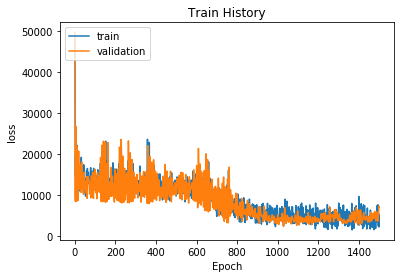

In [135]:
#劃出準確度歷程
import matplotlib.pyplot as plt
def show_tarin_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel("Epoch")
    plt.legend(['train','validation'],loc="upper left")
    plt.show()
show_tarin_history(train_history,'loss','val_loss')
# show_tarin_history(train_history,'loss','loss')

In [136]:
error=model.predict(XX_train).reshape([len(XX_train)])-np.array(YY_train)
np.average(error**2)**(1/2)

69.64290030367559

In [137]:
error=model.predict(XX_test).reshape([len(XX_test)])-np.array(YY_test)
np.average(error**2)**(1/2)

109.60695844757177

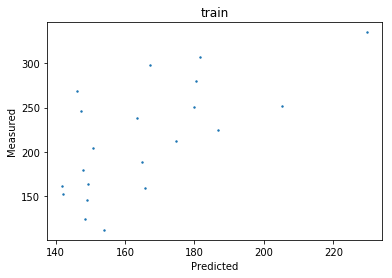

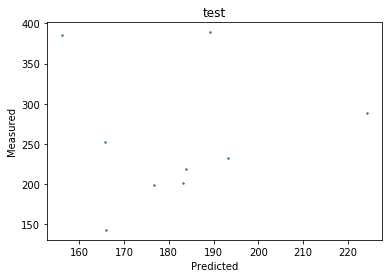

In [138]:
predict=model.predict(XX_train)
plotPaint(predict,YY_train,title="train")
predict=model.predict(XX_test)
plotPaint(predict,YY_test,title="test")

In [139]:
# predict=model.predict(newDataxxG)
# plotPaint(predict,YG,R=1)
# predict=model.predict(newDataxxB)
# plotPaint(predict,YB,R=1)

In [140]:
# predicted_sales = model.predict(newDataxxG)
# predicted_sales

In [141]:
# predicted_sales = model.predict(newDataxxB)
# predicted_sales

# ====================預測類型===================

# 試跑SKLEARN

In [142]:
# 直接將資料分7成訓練集、3成測試集

In [143]:
from sklearn.cross_validation import train_test_split
#將資料分成訓練、測試集 其中測試集佔三成
xx_train, xx_test, Y_train, Y_test =train_test_split(xx,typeY,test_size=0.3,random_state=1)

In [144]:
print(xx_train.shape,xx_test.shape,Y_train.shape,Y_test.shape)

(21, 14) (9, 14) (21,) (9,)


In [145]:
#正確率function
def GorB(someModel,xx_train=xx_train,Y_train=Y_train,xx_test=xx_test,Y_test=Y_test):
    predicted = someModel((xx_train)) #預測結果
    accuracy=list(predicted==Y_train)#回傳true or false的list
    print("訓練集正確率：{}".format(accuracy.count(True)/len(accuracy))) #看正確率


    predicted = someModel((xx_test)) #預測結果
    accuracy=list(predicted==Y_test)#回傳true or false的list
    print("測試集正確率：{}".format(accuracy.count(True)/len(accuracy))) #看正確率

# 線性分類器

In [146]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf1 = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto').fit(xx_train, Y_train)

# predicted = clf1.predict((xx_train)) #預測結果
# accuracy=list(predicted==Y_train)#回傳true or false的list
# print("訓練集正確率：{}".format(accuracy.count(True)/len(accuracy))) #看正確率


# predicted = clf1.predict((xx_test)) #預測結果
# accuracy=list(predicted==Y_test)#回傳true or false的list
# print("測試集正確率：{}".format(accuracy.count(True)/len(accuracy))) #看正確率

GorB(clf1.predict)

訓練集正確率：0.7142857142857143
測試集正確率：0.7777777777777778


D:\anaconda\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


# 高斯單純貝氏分類

In [147]:
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB().fit(xx_train, Y_train)
GorB(clf.predict)

訓練集正確率：0.6666666666666666
測試集正確率：0.6666666666666666


# KNN

In [148]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier().fit(xx_train, Y_train)
GorB(clf.predict)

訓練集正確率：0.7142857142857143
測試集正確率：0.6666666666666666


# 隨機森林

In [149]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier().fit(xx_train, Y_train)
GorB(clf.predict)

訓練集正確率：1.0
測試集正確率：0.8888888888888888


# SVM分類

In [150]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics

# 產生SVC分類器 
#C(誤差容忍，越高，说明越不能容忍出现误差) 
#gamma(隐含地决定了数据映射到新的特征空间后的分布，gamma越大，支持向量越少，gamma值越小，支持向量越多。支持向量的个数影响训练与预测的速度)
#如果gamma设的太大，高斯分布长得又高又瘦， 会造成只会作用于支持向量样本附近

n=13
for i in range(n):
    for j in range(n):
        i2=10**(i-5)
        j2=10**(j-5)


        classifier = svm.SVC(gamma=i2, C=j2,kernel="rbf")
        # classifier = svm.SVC(gamma=20, C=1,kernel="rbf")
        # classifier = svm.SVC(gamma=1000, C=1000,kernel="linear")
        #訓練
        print(i2,j2)
        classifier.fit(xx_train, Y_train)
        GorB(classifier.predict)
        

# predicted = classifier.predict((xx_train)) #預測結果
# accuracy=list(predicted==Y_train)#回傳true or false的list
# print("訓練集正確率：{}".format(accuracy.count(True)/len(accuracy))) #看正確率


# predicted = classifier.predict((xx_test)) #預測結果
# accuracy=list(predicted==Y_test)#回傳true or false的list
# print("測試集正確率：{}".format(accuracy.count(True)/len(accuracy))) #看正確率

1e-05 1e-05
訓練集正確率：0.47619047619047616
測試集正確率：0.3333333333333333
1e-05 0.0001
訓練集正確率：0.47619047619047616
測試集正確率：0.3333333333333333
1e-05 0.001
訓練集正確率：0.47619047619047616
測試集正確率：0.3333333333333333
1e-05 0.01
訓練集正確率：0.47619047619047616
測試集正確率：0.3333333333333333
1e-05 0.1
訓練集正確率：0.47619047619047616
測試集正確率：0.3333333333333333
1e-05 1
訓練集正確率：0.47619047619047616
測試集正確率：0.3333333333333333
1e-05 10
訓練集正確率：0.47619047619047616
測試集正確率：0.3333333333333333
1e-05 100
訓練集正確率：0.47619047619047616
測試集正確率：0.3333333333333333
1e-05 1000
訓練集正確率：0.47619047619047616
測試集正確率：0.3333333333333333
1e-05 10000
訓練集正確率：0.6666666666666666
測試集正確率：0.7777777777777778
1e-05 100000
訓練集正確率：0.9047619047619048
測試集正確率：0.6666666666666666
1e-05 1000000
訓練集正確率：0.9523809523809523
測試集正確率：0.6666666666666666
1e-05 10000000
訓練集正確率：1.0
測試集正確率：0.6666666666666666
0.0001 1e-05
訓練集正確率：0.47619047619047616
測試集正確率：0.3333333333333333
0.0001 0.0001
訓練集正確率：0.47619047619047616
測試集正確率：0.3333333333333333
0.0001 0.001
訓練集正確率：0.47619047619047616
測試集正確率：

In [179]:
classifier = svm.SVC(gamma=0.00001, C=10000000,kernel="rbf")
# classifier = svm.SVC(gamma=20, C=1,kernel="rbf")
# classifier = svm.SVC(gamma=1000, C=1000,kernel="linear")
#訓練
classifier.fit(xx_train, Y_train)
GorB(classifier.predict)


classifier = svm.SVC(gamma=0.01, C=100,kernel="rbf")
# classifier = svm.SVC(gamma=20, C=1,kernel="rbf")
# classifier = svm.SVC(gamma=1000, C=1000,kernel="linear")
#訓練
classifier.fit(xx_train, Y_train)
GorB(classifier.predict)


classifier = svm.SVC(gamma=0.01, C=10,kernel="rbf")
# classifier = svm.SVC(gamma=20, C=1,kernel="rbf")
# classifier = svm.SVC(gamma=1000, C=1000,kernel="linear")
#訓練
classifier.fit(xx_train, Y_train)
GorB(classifier.predict)

訓練集正確率：1.0
測試集正確率：0.6666666666666666
訓練集正確率：0.9523809523809523
測試集正確率：0.7777777777777778
訓練集正確率：0.8095238095238095
測試集正確率：1.0


# DNN分類

In [153]:
from sklearn.neural_network.multilayer_perceptron import MLPClassifier

In [207]:
#多層類神經網路分類器 ()
    #random_state=1初始亂數值設定永遠相同 
    #hidden_layer_sizes=(200,100)有兩層隱藏層，分別有200跟100個神經元 預設單層100
    #activation='identity', 'logistic', 'tanh', 'relu' 啟動函數有四種 預設為'relu'
        #'relu'預設，f(x)=max(0,x) 79.8%
        #'logistic'f(x)=1/(1+exp(x)) 對事件的機率有興趣時使用 46%
        #'identity'f(x)=x 48% 
        #'tanh'??? 46%
    #max_iter=500跌代次數，重複訓練的次數 預設為200
# mlp=MLPClassifier(random_state=1,hidden_layer_sizes=(200,500,300),activation="relu",max_iter=500)
mlp=MLPClassifier(random_state=1,hidden_layer_sizes=(300,500,700,300,500),activation="relu",max_iter=1000)
mlp.fit(xx_train,Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(300, 500, 700, 300, 500),
       learning_rate='constant', learning_rate_init=0.001, max_iter=1000,
       momentum=0.9, nesterovs_momentum=True, power_t=0.5, random_state=1,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [208]:
print("訓練集",len([i for i in mlp.predict(xx_train)==Y_train if i==True])/len(Y_train))
print("測試集",len([i for i in mlp.predict(xx_test)==Y_test if i==True])/len(Y_test))

訓練集 1.0
測試集 0.8888888888888888


# 試跑Keras DNN分類

In [156]:
classes=3
#one-hot
Y_trainO=np_utils.to_categorical(Y_train,classes)
Y_testO=np_utils.to_categorical(Y_test,classes)


In [157]:
Y_trainO[:5],Y_testO[:5]

(array([[0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.]]), array([[0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.]]))

In [171]:
model=Sequential()  #定義model
input_size=len(xx_train[0])#feature數量
batch_size=50#每批樣本大小
epochs=2000#處理幾輪

model.add(Dense(100,input_dim=input_size)) 
model.add(Activation('relu')) #啟動函數
model.add(Dropout(0.2))
model.add(Dense(200)) 
model.add(Activation('relu')) #啟動函數
model.add(Dense(200)) 
model.add(Activation('relu')) #啟動函數
model.add(Dense(100)) 
model.add(Activation('relu')) #啟動函數
model.add(Dropout(0.2))

# for i in range(5):
#     model.add(Dense(100-i*10)) 
#     model.add(Activation('relu')) #啟動函數


# model.add(Dense(20)) 
# model.add(Activation('relu')) #啟動函數

model.add(Dense(10,activation="sigmoid")) 
# model.add(Dense(10,activation="sigmoid")) 

model.add(Dense(3))  #加入層(緊密層) 產出個數10.輸入個數100 次元
model.add(Activation("softmax"))

In [172]:
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

#optimizer最佳化工具sgd(隨機梯度下降法) loss成本函數(交叉熵)   metrics性能評估方法()


model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
# model.compile(optimizer="rmsprop", loss='categorical_crossentropy', metrics=['acc'])
# model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['acc'])
# model.compile(loss="MSE",metrics=['accuracy'],optimizer='sgd')

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 100)               1500      
_________________________________________________________________
activation_67 (Activation)   (None, 100)               0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_70 (Dense)             (None, 200)               20200     
_________________________________________________________________
activation_68 (Activation)   (None, 200)               0         
_________________________________________________________________
dense_71 (Dense)             (None, 200)               40200     
_________________________________________________________________
activation_69 (Activation)   (None, 200)               0         
__________

In [173]:
#訓練開始 xx為feature Y為label  batch_size為每次放多少進去 epochs為處理幾輪 validation_split為抽多少樣本來驗證 verbose=1為每次顯示
train_history=model.fit(xx_train,Y_trainO,batch_size=batch_size,epochs=epochs,validation_split=0.1,verbose=1)
# train_history=model.fit(xx,Y,batch_size=batch_size,epochs=epochs,verbose=1)



Train on 18 samples, validate on 3 samples
Epoch 1/2000
18/18 [==============================] - 1s 35ms/step - loss: 1.0738 - acc: 0.5556 - val_loss: 1.1952 - val_acc: 0.0000e+00
Epoch 2/2000
18/18 [==============================] - 0s 222us/step - loss: 1.0647 - acc: 0.5000 - val_loss: 1.2057 - val_acc: 0.0000e+00
Epoch 3/2000
18/18 [==============================] - 0s 222us/step - loss: 1.0651 - acc: 0.5000 - val_loss: 1.2191 - val_acc: 0.0000e+00
Epoch 4/2000
18/18 [==============================] - 0s 222us/step - loss: 1.0576 - acc: 0.5000 - val_loss: 1.2348 - val_acc: 0.0000e+00
Epoch 5/2000
18/18 [==============================] - 0s 222us/step - loss: 1.0478 - acc: 0.5556 - val_loss: 1.2527 - val_acc: 0.0000e+00
Epoch 6/2000
18/18 [==============================] - 0s 222us/step - loss: 1.0313 - acc: 0.5556 - val_loss: 1.2720 - val_acc: 0.0000e+00
Epoch 7/2000
18/18 [==============================] - 0s 278us/step - loss: 1.0488 - acc: 0.5556 - val_loss: 1.2931 - val_acc: 0.0

Epoch 60/2000
18/18 [==============================] - 0s 278us/step - loss: 0.8962 - acc: 0.5556 - val_loss: 1.3448 - val_acc: 0.0000e+00
Epoch 61/2000
18/18 [==============================] - 0s 222us/step - loss: 0.8872 - acc: 0.5556 - val_loss: 1.3418 - val_acc: 0.0000e+00
Epoch 62/2000
18/18 [==============================] - 0s 222us/step - loss: 0.9034 - acc: 0.5556 - val_loss: 1.3393 - val_acc: 0.0000e+00
Epoch 63/2000
18/18 [==============================] - 0s 222us/step - loss: 0.9038 - acc: 0.5556 - val_loss: 1.3362 - val_acc: 0.0000e+00
Epoch 64/2000
18/18 [==============================] - 0s 278us/step - loss: 0.8781 - acc: 0.5556 - val_loss: 1.3332 - val_acc: 0.0000e+00
Epoch 65/2000
18/18 [==============================] - 0s 222us/step - loss: 0.8855 - acc: 0.5556 - val_loss: 1.3304 - val_acc: 0.0000e+00
Epoch 66/2000
18/18 [==============================] - 0s 222us/step - loss: 0.8857 - acc: 0.5556 - val_loss: 1.3279 - val_acc: 0.0000e+00
Epoch 67/2000
18/18 [======

18/18 [==============================] - 0s 278us/step - loss: 0.6460 - acc: 0.7222 - val_loss: 1.3465 - val_acc: 0.3333
Epoch 121/2000
18/18 [==============================] - 0s 222us/step - loss: 0.6133 - acc: 0.7222 - val_loss: 1.3518 - val_acc: 0.3333
Epoch 122/2000
18/18 [==============================] - 0s 333us/step - loss: 0.6277 - acc: 0.7222 - val_loss: 1.3538 - val_acc: 0.3333
Epoch 123/2000
18/18 [==============================] - 0s 278us/step - loss: 0.6408 - acc: 0.6667 - val_loss: 1.3537 - val_acc: 0.3333
Epoch 124/2000
18/18 [==============================] - 0s 278us/step - loss: 0.5845 - acc: 0.7778 - val_loss: 1.3549 - val_acc: 0.3333
Epoch 125/2000
18/18 [==============================] - 0s 333us/step - loss: 0.5524 - acc: 0.7778 - val_loss: 1.3589 - val_acc: 0.3333
Epoch 126/2000
18/18 [==============================] - 0s 278us/step - loss: 0.5761 - acc: 0.7778 - val_loss: 1.3650 - val_acc: 0.3333
Epoch 127/2000
18/18 [==============================] - 0s 278u

Epoch 181/2000
18/18 [==============================] - 0s 278us/step - loss: 0.2712 - acc: 1.0000 - val_loss: 1.6554 - val_acc: 0.3333
Epoch 182/2000
18/18 [==============================] - 0s 278us/step - loss: 0.2798 - acc: 0.9444 - val_loss: 1.6553 - val_acc: 0.3333
Epoch 183/2000
18/18 [==============================] - 0s 278us/step - loss: 0.2159 - acc: 1.0000 - val_loss: 1.6563 - val_acc: 0.3333
Epoch 184/2000
18/18 [==============================] - 0s 278us/step - loss: 0.2602 - acc: 1.0000 - val_loss: 1.6584 - val_acc: 0.3333
Epoch 185/2000
18/18 [==============================] - 0s 333us/step - loss: 0.2485 - acc: 1.0000 - val_loss: 1.6608 - val_acc: 0.3333
Epoch 186/2000
18/18 [==============================] - 0s 278us/step - loss: 0.2180 - acc: 0.9444 - val_loss: 1.6616 - val_acc: 0.3333
Epoch 187/2000
18/18 [==============================] - 0s 222us/step - loss: 0.2111 - acc: 1.0000 - val_loss: 1.6619 - val_acc: 0.3333
Epoch 188/2000
18/18 [==========================

Epoch 242/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0917 - acc: 1.0000 - val_loss: 1.9228 - val_acc: 0.3333
Epoch 243/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0750 - acc: 1.0000 - val_loss: 1.9387 - val_acc: 0.3333
Epoch 244/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0772 - acc: 1.0000 - val_loss: 1.9574 - val_acc: 0.3333
Epoch 245/2000
18/18 [==============================] - 0s 333us/step - loss: 0.0865 - acc: 1.0000 - val_loss: 1.9734 - val_acc: 0.3333
Epoch 246/2000
18/18 [==============================] - 0s 278us/step - loss: 0.1064 - acc: 1.0000 - val_loss: 1.9803 - val_acc: 0.3333
Epoch 247/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0856 - acc: 1.0000 - val_loss: 1.9750 - val_acc: 0.3333
Epoch 248/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0844 - acc: 1.0000 - val_loss: 1.9772 - val_acc: 0.3333
Epoch 249/2000
18/18 [==========================

Epoch 303/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0452 - acc: 1.0000 - val_loss: 2.1521 - val_acc: 0.3333
Epoch 304/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0551 - acc: 1.0000 - val_loss: 2.1570 - val_acc: 0.3333
Epoch 305/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0424 - acc: 1.0000 - val_loss: 2.1585 - val_acc: 0.3333
Epoch 306/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0487 - acc: 1.0000 - val_loss: 2.1735 - val_acc: 0.3333
Epoch 307/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0500 - acc: 1.0000 - val_loss: 2.1804 - val_acc: 0.3333
Epoch 308/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0402 - acc: 1.0000 - val_loss: 2.1870 - val_acc: 0.3333
Epoch 309/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0436 - acc: 1.0000 - val_loss: 2.1957 - val_acc: 0.3333
Epoch 310/2000
18/18 [==========================

Epoch 364/2000
18/18 [==============================] - 0s 333us/step - loss: 0.0295 - acc: 1.0000 - val_loss: 2.5428 - val_acc: 0.3333
Epoch 365/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0334 - acc: 1.0000 - val_loss: 2.5431 - val_acc: 0.3333
Epoch 366/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0308 - acc: 1.0000 - val_loss: 2.5393 - val_acc: 0.3333
Epoch 367/2000
18/18 [==============================] - 0s 333us/step - loss: 0.0301 - acc: 1.0000 - val_loss: 2.5336 - val_acc: 0.3333
Epoch 368/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0388 - acc: 1.0000 - val_loss: 2.5354 - val_acc: 0.3333
Epoch 369/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0280 - acc: 1.0000 - val_loss: 2.5353 - val_acc: 0.3333
Epoch 370/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0284 - acc: 1.0000 - val_loss: 2.5332 - val_acc: 0.3333
Epoch 371/2000
18/18 [==========================

Epoch 425/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0247 - acc: 1.0000 - val_loss: 2.3650 - val_acc: 0.3333
Epoch 426/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0249 - acc: 1.0000 - val_loss: 2.3645 - val_acc: 0.3333
Epoch 427/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0299 - acc: 1.0000 - val_loss: 2.3828 - val_acc: 0.3333
Epoch 428/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0214 - acc: 1.0000 - val_loss: 2.3902 - val_acc: 0.3333
Epoch 429/2000
18/18 [==============================] - 0s 333us/step - loss: 0.0221 - acc: 1.0000 - val_loss: 2.3987 - val_acc: 0.3333
Epoch 430/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0228 - acc: 1.0000 - val_loss: 2.4061 - val_acc: 0.3333
Epoch 431/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0230 - acc: 1.0000 - val_loss: 2.4131 - val_acc: 0.3333
Epoch 432/2000
18/18 [==========================

Epoch 486/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0195 - acc: 1.0000 - val_loss: 2.5446 - val_acc: 0.3333
Epoch 487/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0183 - acc: 1.0000 - val_loss: 2.5408 - val_acc: 0.3333
Epoch 488/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0177 - acc: 1.0000 - val_loss: 2.5392 - val_acc: 0.3333
Epoch 489/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0169 - acc: 1.0000 - val_loss: 2.5364 - val_acc: 0.3333
Epoch 490/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0175 - acc: 1.0000 - val_loss: 2.5360 - val_acc: 0.3333
Epoch 491/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0173 - acc: 1.0000 - val_loss: 2.5344 - val_acc: 0.3333
Epoch 492/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0175 - acc: 1.0000 - val_loss: 2.5322 - val_acc: 0.3333
Epoch 493/2000
18/18 [==========================

Epoch 547/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0144 - acc: 1.0000 - val_loss: 2.5696 - val_acc: 0.3333
Epoch 548/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0155 - acc: 1.0000 - val_loss: 2.5719 - val_acc: 0.3333
Epoch 549/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0161 - acc: 1.0000 - val_loss: 2.5796 - val_acc: 0.3333
Epoch 550/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0161 - acc: 1.0000 - val_loss: 2.5848 - val_acc: 0.3333
Epoch 551/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0152 - acc: 1.0000 - val_loss: 2.5877 - val_acc: 0.3333
Epoch 552/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0153 - acc: 1.0000 - val_loss: 2.5918 - val_acc: 0.3333
Epoch 553/2000
18/18 [==============================] - 0s 333us/step - loss: 0.0160 - acc: 1.0000 - val_loss: 2.5951 - val_acc: 0.3333
Epoch 554/2000
18/18 [==========================

Epoch 608/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0136 - acc: 1.0000 - val_loss: 2.3796 - val_acc: 0.3333
Epoch 609/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0120 - acc: 1.0000 - val_loss: 2.3585 - val_acc: 0.3333
Epoch 610/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0131 - acc: 1.0000 - val_loss: 2.3413 - val_acc: 0.3333
Epoch 611/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0129 - acc: 1.0000 - val_loss: 2.3287 - val_acc: 0.3333
Epoch 612/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0132 - acc: 1.0000 - val_loss: 2.3187 - val_acc: 0.3333
Epoch 613/2000
18/18 [==============================] - 0s 333us/step - loss: 0.0142 - acc: 1.0000 - val_loss: 2.3121 - val_acc: 0.3333
Epoch 614/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0151 - acc: 1.0000 - val_loss: 2.3067 - val_acc: 0.3333
Epoch 615/2000
18/18 [==========================

Epoch 669/2000
18/18 [==============================] - 0s 333us/step - loss: 0.0126 - acc: 1.0000 - val_loss: 2.6797 - val_acc: 0.3333
Epoch 670/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0110 - acc: 1.0000 - val_loss: 2.6862 - val_acc: 0.3333
Epoch 671/2000
18/18 [==============================] - 0s 333us/step - loss: 0.0130 - acc: 1.0000 - val_loss: 2.6896 - val_acc: 0.3333
Epoch 672/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0124 - acc: 1.0000 - val_loss: 2.6902 - val_acc: 0.3333
Epoch 673/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0125 - acc: 1.0000 - val_loss: 2.6929 - val_acc: 0.3333
Epoch 674/2000
18/18 [==============================] - 0s 444us/step - loss: 0.0127 - acc: 1.0000 - val_loss: 2.6959 - val_acc: 0.3333
Epoch 675/2000
18/18 [==============================] - 0s 333us/step - loss: 0.0117 - acc: 1.0000 - val_loss: 2.6990 - val_acc: 0.3333
Epoch 676/2000
18/18 [==========================

Epoch 730/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0107 - acc: 1.0000 - val_loss: 3.1069 - val_acc: 0.3333
Epoch 731/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0098 - acc: 1.0000 - val_loss: 3.1037 - val_acc: 0.3333
Epoch 732/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0134 - acc: 1.0000 - val_loss: 3.1055 - val_acc: 0.3333
Epoch 733/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0125 - acc: 1.0000 - val_loss: 3.0998 - val_acc: 0.3333
Epoch 734/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0108 - acc: 1.0000 - val_loss: 3.0990 - val_acc: 0.3333
Epoch 735/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0104 - acc: 1.0000 - val_loss: 3.0982 - val_acc: 0.3333
Epoch 736/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0106 - acc: 1.0000 - val_loss: 3.0964 - val_acc: 0.3333
Epoch 737/2000
18/18 [==========================

Epoch 791/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0098 - acc: 1.0000 - val_loss: 3.0543 - val_acc: 0.3333
Epoch 792/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0093 - acc: 1.0000 - val_loss: 3.0532 - val_acc: 0.3333
Epoch 793/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0104 - acc: 1.0000 - val_loss: 3.0523 - val_acc: 0.3333
Epoch 794/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0094 - acc: 1.0000 - val_loss: 3.0500 - val_acc: 0.3333
Epoch 795/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0112 - acc: 1.0000 - val_loss: 3.0451 - val_acc: 0.3333
Epoch 796/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0094 - acc: 1.0000 - val_loss: 3.0423 - val_acc: 0.3333
Epoch 797/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0104 - acc: 1.0000 - val_loss: 3.0358 - val_acc: 0.3333
Epoch 798/2000
18/18 [==========================

Epoch 852/2000
18/18 [==============================] - 0s 333us/step - loss: 0.0086 - acc: 1.0000 - val_loss: 3.0850 - val_acc: 0.3333
Epoch 853/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0082 - acc: 1.0000 - val_loss: 3.0838 - val_acc: 0.3333
Epoch 854/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0080 - acc: 1.0000 - val_loss: 3.0825 - val_acc: 0.3333
Epoch 855/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0087 - acc: 1.0000 - val_loss: 3.0811 - val_acc: 0.3333
Epoch 856/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0093 - acc: 1.0000 - val_loss: 3.0806 - val_acc: 0.3333
Epoch 857/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0095 - acc: 1.0000 - val_loss: 3.0803 - val_acc: 0.3333
Epoch 858/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0081 - acc: 1.0000 - val_loss: 3.0806 - val_acc: 0.3333
Epoch 859/2000
18/18 [==========================

Epoch 913/2000
18/18 [==============================] - 0s 333us/step - loss: 0.0075 - acc: 1.0000 - val_loss: 3.3000 - val_acc: 0.3333
Epoch 914/2000
18/18 [==============================] - 0s 333us/step - loss: 0.0165 - acc: 1.0000 - val_loss: 3.2855 - val_acc: 0.3333
Epoch 915/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0080 - acc: 1.0000 - val_loss: 3.2814 - val_acc: 0.3333
Epoch 916/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0102 - acc: 1.0000 - val_loss: 3.2792 - val_acc: 0.3333
Epoch 917/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0080 - acc: 1.0000 - val_loss: 3.2750 - val_acc: 0.3333
Epoch 918/2000
18/18 [==============================] - 0s 389us/step - loss: 0.0078 - acc: 1.0000 - val_loss: 3.2719 - val_acc: 0.3333
Epoch 919/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0082 - acc: 1.0000 - val_loss: 3.2714 - val_acc: 0.3333
Epoch 920/2000
18/18 [==========================

Epoch 974/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0070 - acc: 1.0000 - val_loss: 3.1785 - val_acc: 0.3333
Epoch 975/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0071 - acc: 1.0000 - val_loss: 3.1788 - val_acc: 0.3333
Epoch 976/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0069 - acc: 1.0000 - val_loss: 3.1792 - val_acc: 0.3333
Epoch 977/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0070 - acc: 1.0000 - val_loss: 3.1795 - val_acc: 0.3333
Epoch 978/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0072 - acc: 1.0000 - val_loss: 3.1792 - val_acc: 0.3333
Epoch 979/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0069 - acc: 1.0000 - val_loss: 3.1799 - val_acc: 0.3333
Epoch 980/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0083 - acc: 1.0000 - val_loss: 3.1768 - val_acc: 0.3333
Epoch 981/2000
18/18 [==========================

Epoch 1034/2000
18/18 [==============================] - 0s 333us/step - loss: 0.0068 - acc: 1.0000 - val_loss: 3.1078 - val_acc: 0.3333
Epoch 1035/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0067 - acc: 1.0000 - val_loss: 3.1079 - val_acc: 0.3333
Epoch 1036/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0064 - acc: 1.0000 - val_loss: 3.1078 - val_acc: 0.3333
Epoch 1037/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0068 - acc: 1.0000 - val_loss: 3.1079 - val_acc: 0.3333
Epoch 1038/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0062 - acc: 1.0000 - val_loss: 3.1080 - val_acc: 0.3333
Epoch 1039/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0063 - acc: 1.0000 - val_loss: 3.1084 - val_acc: 0.3333
Epoch 1040/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0079 - acc: 1.0000 - val_loss: 3.1091 - val_acc: 0.3333
Epoch 1041/2000
18/18 [==================

Epoch 1094/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0066 - acc: 1.0000 - val_loss: 3.2026 - val_acc: 0.3333
Epoch 1095/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0062 - acc: 1.0000 - val_loss: 3.2048 - val_acc: 0.3333
Epoch 1096/2000
18/18 [==============================] - 0s 167us/step - loss: 0.0066 - acc: 1.0000 - val_loss: 3.2069 - val_acc: 0.3333
Epoch 1097/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0061 - acc: 1.0000 - val_loss: 3.2086 - val_acc: 0.3333
Epoch 1098/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0063 - acc: 1.0000 - val_loss: 3.2103 - val_acc: 0.3333
Epoch 1099/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0058 - acc: 1.0000 - val_loss: 3.2118 - val_acc: 0.3333
Epoch 1100/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0062 - acc: 1.0000 - val_loss: 3.2131 - val_acc: 0.3333
Epoch 1101/2000
18/18 [==================

Epoch 1154/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0063 - acc: 1.0000 - val_loss: 3.4164 - val_acc: 0.3333
Epoch 1155/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0057 - acc: 1.0000 - val_loss: 3.4191 - val_acc: 0.3333
Epoch 1156/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0057 - acc: 1.0000 - val_loss: 3.4215 - val_acc: 0.3333
Epoch 1157/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0066 - acc: 1.0000 - val_loss: 3.4219 - val_acc: 0.3333
Epoch 1158/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0066 - acc: 1.0000 - val_loss: 3.4210 - val_acc: 0.3333
Epoch 1159/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0093 - acc: 1.0000 - val_loss: 3.4120 - val_acc: 0.3333
Epoch 1160/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0060 - acc: 1.0000 - val_loss: 3.4082 - val_acc: 0.3333
Epoch 1161/2000
18/18 [==================

Epoch 1214/2000
18/18 [==============================] - 0s 333us/step - loss: 0.0058 - acc: 1.0000 - val_loss: 3.5609 - val_acc: 0.3333
Epoch 1215/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0053 - acc: 1.0000 - val_loss: 3.5598 - val_acc: 0.3333
Epoch 1216/2000
18/18 [==============================] - 0s 389us/step - loss: 0.0056 - acc: 1.0000 - val_loss: 3.5588 - val_acc: 0.3333
Epoch 1217/2000
18/18 [==============================] - 0s 333us/step - loss: 0.0061 - acc: 1.0000 - val_loss: 3.5561 - val_acc: 0.3333
Epoch 1218/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0055 - acc: 1.0000 - val_loss: 3.5544 - val_acc: 0.3333
Epoch 1219/2000
18/18 [==============================] - 0s 333us/step - loss: 0.0053 - acc: 1.0000 - val_loss: 3.5529 - val_acc: 0.3333
Epoch 1220/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0055 - acc: 1.0000 - val_loss: 3.5510 - val_acc: 0.3333
Epoch 1221/2000
18/18 [==================

Epoch 1274/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0051 - acc: 1.0000 - val_loss: 3.5870 - val_acc: 0.3333
Epoch 1275/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0050 - acc: 1.0000 - val_loss: 3.5867 - val_acc: 0.3333
Epoch 1276/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0058 - acc: 1.0000 - val_loss: 3.5854 - val_acc: 0.3333
Epoch 1277/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0049 - acc: 1.0000 - val_loss: 3.5847 - val_acc: 0.3333
Epoch 1278/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0050 - acc: 1.0000 - val_loss: 3.5837 - val_acc: 0.3333
Epoch 1279/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0062 - acc: 1.0000 - val_loss: 3.5828 - val_acc: 0.3333
Epoch 1280/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0062 - acc: 1.0000 - val_loss: 3.5780 - val_acc: 0.3333
Epoch 1281/2000
18/18 [==================

Epoch 1334/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0053 - acc: 1.0000 - val_loss: 3.5268 - val_acc: 0.3333
Epoch 1335/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0050 - acc: 1.0000 - val_loss: 3.5263 - val_acc: 0.3333
Epoch 1336/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0051 - acc: 1.0000 - val_loss: 3.5258 - val_acc: 0.3333
Epoch 1337/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0052 - acc: 1.0000 - val_loss: 3.5252 - val_acc: 0.3333
Epoch 1338/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0048 - acc: 1.0000 - val_loss: 3.5247 - val_acc: 0.3333
Epoch 1339/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0049 - acc: 1.0000 - val_loss: 3.5243 - val_acc: 0.3333
Epoch 1340/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0051 - acc: 1.0000 - val_loss: 3.5256 - val_acc: 0.3333
Epoch 1341/2000
18/18 [==================

Epoch 1394/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0047 - acc: 1.0000 - val_loss: 3.5241 - val_acc: 0.3333
Epoch 1395/2000
18/18 [==============================] - 0s 333us/step - loss: 0.0048 - acc: 1.0000 - val_loss: 3.5230 - val_acc: 0.3333
Epoch 1396/2000
18/18 [==============================] - 0s 333us/step - loss: 0.0045 - acc: 1.0000 - val_loss: 3.5222 - val_acc: 0.3333
Epoch 1397/2000
18/18 [==============================] - 0s 333us/step - loss: 0.0052 - acc: 1.0000 - val_loss: 3.5218 - val_acc: 0.3333
Epoch 1398/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0048 - acc: 1.0000 - val_loss: 3.5209 - val_acc: 0.3333
Epoch 1399/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0046 - acc: 1.0000 - val_loss: 3.5206 - val_acc: 0.3333
Epoch 1400/2000
18/18 [==============================] - 0s 389us/step - loss: 0.0052 - acc: 1.0000 - val_loss: 3.5190 - val_acc: 0.3333
Epoch 1401/2000
18/18 [==================

Epoch 1454/2000
18/18 [==============================] - 0s 2ms/step - loss: 0.0056 - acc: 1.0000 - val_loss: 3.4638 - val_acc: 0.3333
Epoch 1455/2000
18/18 [==============================] - 0s 444us/step - loss: 0.0061 - acc: 1.0000 - val_loss: 3.4668 - val_acc: 0.3333
Epoch 1456/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0045 - acc: 1.0000 - val_loss: 3.4679 - val_acc: 0.3333
Epoch 1457/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0049 - acc: 1.0000 - val_loss: 3.4706 - val_acc: 0.3333
Epoch 1458/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0044 - acc: 1.0000 - val_loss: 3.4721 - val_acc: 0.3333
Epoch 1459/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0049 - acc: 1.0000 - val_loss: 3.4717 - val_acc: 0.3333
Epoch 1460/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0051 - acc: 1.0000 - val_loss: 3.4717 - val_acc: 0.3333
Epoch 1461/2000
18/18 [====================

Epoch 1514/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0044 - acc: 1.0000 - val_loss: 3.5018 - val_acc: 0.3333
Epoch 1515/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0047 - acc: 1.0000 - val_loss: 3.5035 - val_acc: 0.3333
Epoch 1516/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0042 - acc: 1.0000 - val_loss: 3.5048 - val_acc: 0.3333
Epoch 1517/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0045 - acc: 1.0000 - val_loss: 3.5058 - val_acc: 0.3333
Epoch 1518/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0041 - acc: 1.0000 - val_loss: 3.5066 - val_acc: 0.3333
Epoch 1519/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0045 - acc: 1.0000 - val_loss: 3.5068 - val_acc: 0.3333
Epoch 1520/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0048 - acc: 1.0000 - val_loss: 3.5064 - val_acc: 0.3333
Epoch 1521/2000
18/18 [==================

Epoch 1574/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0041 - acc: 1.0000 - val_loss: 3.5349 - val_acc: 0.3333
Epoch 1575/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0054 - acc: 1.0000 - val_loss: 3.5356 - val_acc: 0.3333
Epoch 1576/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0041 - acc: 1.0000 - val_loss: 3.5367 - val_acc: 0.3333
Epoch 1577/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0045 - acc: 1.0000 - val_loss: 3.5365 - val_acc: 0.3333
Epoch 1578/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0042 - acc: 1.0000 - val_loss: 3.5369 - val_acc: 0.3333
Epoch 1579/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0044 - acc: 1.0000 - val_loss: 3.5373 - val_acc: 0.3333
Epoch 1580/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0040 - acc: 1.0000 - val_loss: 3.5379 - val_acc: 0.3333
Epoch 1581/2000
18/18 [==================

Epoch 1634/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0045 - acc: 1.0000 - val_loss: 3.5314 - val_acc: 0.3333
Epoch 1635/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0039 - acc: 1.0000 - val_loss: 3.5315 - val_acc: 0.3333
Epoch 1636/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0045 - acc: 1.0000 - val_loss: 3.5318 - val_acc: 0.3333
Epoch 1637/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0039 - acc: 1.0000 - val_loss: 3.5321 - val_acc: 0.3333
Epoch 1638/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0038 - acc: 1.0000 - val_loss: 3.5323 - val_acc: 0.3333
Epoch 1639/2000
18/18 [==============================] - 0s 333us/step - loss: 0.0044 - acc: 1.0000 - val_loss: 3.5327 - val_acc: 0.3333
Epoch 1640/2000
18/18 [==============================] - 0s 333us/step - loss: 0.0047 - acc: 1.0000 - val_loss: 3.5323 - val_acc: 0.3333
Epoch 1641/2000
18/18 [==================

Epoch 1694/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0047 - acc: 1.0000 - val_loss: 3.5987 - val_acc: 0.3333
Epoch 1695/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0037 - acc: 1.0000 - val_loss: 3.6002 - val_acc: 0.3333
Epoch 1696/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0040 - acc: 1.0000 - val_loss: 3.6013 - val_acc: 0.3333
Epoch 1697/2000
18/18 [==============================] - 0s 333us/step - loss: 0.0043 - acc: 1.0000 - val_loss: 3.6002 - val_acc: 0.3333
Epoch 1698/2000
18/18 [==============================] - 0s 333us/step - loss: 0.0040 - acc: 1.0000 - val_loss: 3.6012 - val_acc: 0.3333
Epoch 1699/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0037 - acc: 1.0000 - val_loss: 3.6019 - val_acc: 0.3333
Epoch 1700/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0039 - acc: 1.0000 - val_loss: 3.6026 - val_acc: 0.3333
Epoch 1701/2000
18/18 [==================

Epoch 1754/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0036 - acc: 1.0000 - val_loss: 3.7524 - val_acc: 0.3333
Epoch 1755/2000
18/18 [==============================] - 0s 333us/step - loss: 0.0038 - acc: 1.0000 - val_loss: 3.7536 - val_acc: 0.3333
Epoch 1756/2000
18/18 [==============================] - 0s 389us/step - loss: 0.0037 - acc: 1.0000 - val_loss: 3.7549 - val_acc: 0.3333
Epoch 1757/2000
18/18 [==============================] - 0s 333us/step - loss: 0.0039 - acc: 1.0000 - val_loss: 3.7554 - val_acc: 0.3333
Epoch 1758/2000
18/18 [==============================] - 0s 333us/step - loss: 0.0038 - acc: 1.0000 - val_loss: 3.7561 - val_acc: 0.3333
Epoch 1759/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0035 - acc: 1.0000 - val_loss: 3.7568 - val_acc: 0.3333
Epoch 1760/2000
18/18 [==============================] - 0s 333us/step - loss: 0.0037 - acc: 1.0000 - val_loss: 3.7569 - val_acc: 0.3333
Epoch 1761/2000
18/18 [==================

Epoch 1814/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0036 - acc: 1.0000 - val_loss: 3.7604 - val_acc: 0.3333
Epoch 1815/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0037 - acc: 1.0000 - val_loss: 3.7604 - val_acc: 0.3333
Epoch 1816/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0051 - acc: 1.0000 - val_loss: 3.7689 - val_acc: 0.3333
Epoch 1817/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0036 - acc: 1.0000 - val_loss: 3.7723 - val_acc: 0.3333
Epoch 1818/2000
18/18 [==============================] - 0s 333us/step - loss: 0.0035 - acc: 1.0000 - val_loss: 3.7754 - val_acc: 0.3333
Epoch 1819/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0035 - acc: 1.0000 - val_loss: 3.7783 - val_acc: 0.3333
Epoch 1820/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0035 - acc: 1.0000 - val_loss: 3.7810 - val_acc: 0.3333
Epoch 1821/2000
18/18 [==================

Epoch 1874/2000
18/18 [==============================] - 0s 333us/step - loss: 0.0085 - acc: 1.0000 - val_loss: 3.8149 - val_acc: 0.3333
Epoch 1875/2000
18/18 [==============================] - 0s 445us/step - loss: 0.0036 - acc: 1.0000 - val_loss: 3.8090 - val_acc: 0.3333
Epoch 1876/2000
18/18 [==============================] - 0s 333us/step - loss: 0.0038 - acc: 1.0000 - val_loss: 3.8036 - val_acc: 0.3333
Epoch 1877/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0037 - acc: 1.0000 - val_loss: 3.7988 - val_acc: 0.3333
Epoch 1878/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0044 - acc: 1.0000 - val_loss: 3.7942 - val_acc: 0.3333
Epoch 1879/2000
18/18 [==============================] - 0s 389us/step - loss: 0.0036 - acc: 1.0000 - val_loss: 3.7903 - val_acc: 0.3333
Epoch 1880/2000
18/18 [==============================] - 0s 333us/step - loss: 0.0037 - acc: 1.0000 - val_loss: 3.7863 - val_acc: 0.3333
Epoch 1881/2000
18/18 [==================

Epoch 1934/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0032 - acc: 1.0000 - val_loss: 3.9142 - val_acc: 0.3333
Epoch 1935/2000
18/18 [==============================] - 0s 333us/step - loss: 0.0035 - acc: 1.0000 - val_loss: 3.9249 - val_acc: 0.3333
Epoch 1936/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0031 - acc: 1.0000 - val_loss: 3.9343 - val_acc: 0.3333
Epoch 1937/2000
18/18 [==============================] - 0s 389us/step - loss: 0.0033 - acc: 1.0000 - val_loss: 3.9427 - val_acc: 0.3333
Epoch 1938/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0033 - acc: 1.0000 - val_loss: 3.9502 - val_acc: 0.3333
Epoch 1939/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0044 - acc: 1.0000 - val_loss: 3.9585 - val_acc: 0.3333
Epoch 1940/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0036 - acc: 1.0000 - val_loss: 3.9650 - val_acc: 0.3333
Epoch 1941/2000
18/18 [==================

Epoch 1994/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0032 - acc: 1.0000 - val_loss: 3.9334 - val_acc: 0.3333
Epoch 1995/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0037 - acc: 1.0000 - val_loss: 3.9305 - val_acc: 0.3333
Epoch 1996/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0050 - acc: 1.0000 - val_loss: 3.9241 - val_acc: 0.3333
Epoch 1997/2000
18/18 [==============================] - 0s 222us/step - loss: 0.0032 - acc: 1.0000 - val_loss: 3.9196 - val_acc: 0.3333
Epoch 1998/2000
18/18 [==============================] - 0s 333us/step - loss: 0.0032 - acc: 1.0000 - val_loss: 3.9156 - val_acc: 0.3333
Epoch 1999/2000
18/18 [==============================] - 0s 333us/step - loss: 0.0032 - acc: 1.0000 - val_loss: 3.9120 - val_acc: 0.3333
Epoch 2000/2000
18/18 [==============================] - 0s 278us/step - loss: 0.0033 - acc: 1.0000 - val_loss: 3.9088 - val_acc: 0.3333


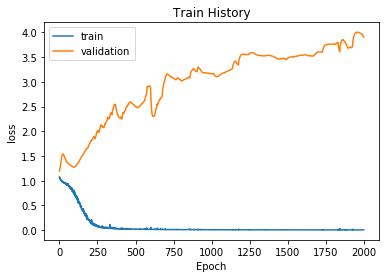

In [174]:
#劃出準確度歷程
import matplotlib.pyplot as plt
def show_tarin_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel("Epoch")
    plt.legend(['train','validation'],loc="upper left")
    plt.show()
show_tarin_history(train_history,'loss','val_loss')
# show_tarin_history(train_history,'loss','loss')

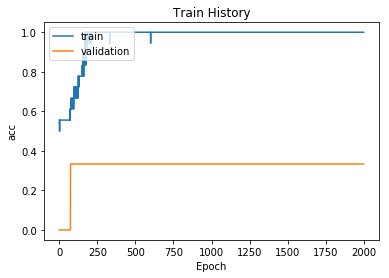

In [175]:
show_tarin_history(train_history,'acc','val_acc')

In [176]:
score=model.evaluate(xx_train,Y_trainO,verbose=1)
print('Train accuracy:',score[1])
score=model.evaluate(xx_test,Y_testO,verbose=1)
print('Test accuracy:',score[1])

21/21 [==============================] - 0s 143us/step
Train accuracy: 0.9047619104385376
9/9 [==============================] - 0s 222us/step
Test accuracy: 0.4444444477558136


In [177]:
list(model.predict_classes(xx_test)==Y_test).count(True)/len(Y_test)

9/9 [==============================] - 0s 22ms/step


0.4444444444444444

In [178]:
model.predict_classes(xx_test)

9/9 [==============================] - 0s 111us/step


array([2, 1, 1, 2, 2, 2, 1, 1, 1], dtype=int64)

# 分群

# kmeans分群 (xx>>正規化後的feature)

如果直接用X(非正規化feature)則會變成按人口區分(因為人口的值特別高)

In [166]:
xx.shape

(30, 14)

In [167]:
Y.shape

(30,)

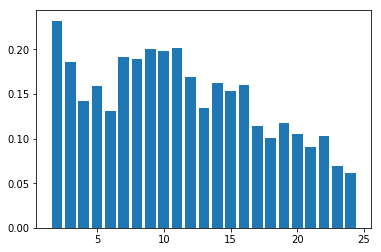

[0.2320054132639847, 0.18561702924343415, 0.14187899288327321, 0.15859544785099444, 0.13103977043133663, 0.19134846355240587, 0.18906768925860734, 0.20011745995955454, 0.19809988675585585, 0.201572036881026, 0.16929873353810257, 0.1344278519856217, 0.16252993959039244, 0.1528579040042141, 0.15972056454430333, 0.11419385780065087, 0.10107197794967643, 0.11775874683935249, 0.10501547728637546, 0.09083459462831417, 0.1028587477890448, 0.06927918116157136, 0.06102323898254659]


In [168]:
from sklearn import cluster, datasets, metrics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# 印出效用最高的kmeans群
silhouette_avgs = []
ks = range(2, 25)
for k in ks:
    kmeans_fit = cluster.KMeans(n_clusters = k,max_iter=3000).fit(xx)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(xx, cluster_labels) #組間變異
    silhouette_avgs.append(silhouette_avg)

# 作圖並印出 k = 2 到 30 的績效
plt.bar(ks, silhouette_avgs)
plt.show()
print(silhouette_avgs)

In [65]:
k=2
km = KMeans(n_clusters=k,max_iter=3000)  #K=4群
y_pred = km.fit_predict(xx)

In [66]:
y_pred

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0])

In [67]:
#利用PCA降維法、將feature印射在二維空間
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_xx = pca.fit_transform(xx)

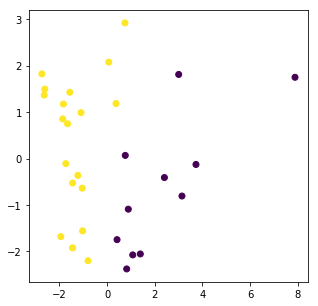

['costPower', 'human', 'simCostDien', 'busStation', 'conStore', 'star', 'mc', 'ken', 'wa', 'watson', 'pxmart', 'carrefour']
第0群資料中心
[-0.39, 0.36, 0.56, 0.64, 0.98, 0.92, 0.66, 0.68, 0.72, 0.93, -0.02, 0.01, 0.92]
第1群資料中心
[0.22, -0.21, -0.32, -0.37, -0.56, -0.53, -0.38, -0.4, -0.41, -0.54, 0.01, -0.01, -0.53]


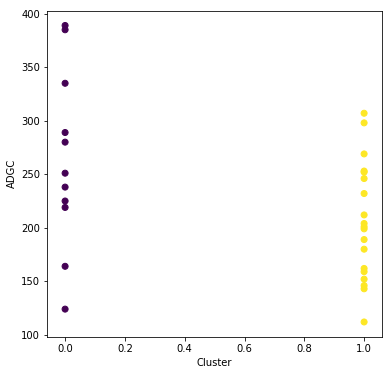

In [68]:
plt.figure(figsize=(5, 5))
# plt.xlabel('costPower')
# plt.ylabel('Nhuman')
# plt.scatter(xx[:, 0], xx[:, 1], c=y_pred) #C是第三維度 已顏色做維度
plt.scatter(reduced_xx.T[0], reduced_xx.T[1], c=y_pred)
plt.legend()
plt.show()


print([i.replace("_Analyze","").replace("N","") for i in ['costPower_Analyze','Nhuman_Analyze',"NsimCostDien",
        'NbusStation_Analyze','NconStore_Analyze','Nstar_Analyze',
        'Nmc_Analyze', 'Nken_Analyze','Nwa_Analyze',
        'Nwatson_Analyze','Npxmart_Analyze','Ncarrefour_Analyze']])
x=0
for i in np.around(km.cluster_centers_,2):
    print("第{}群資料中心".format(x),list(i),sep="\n")
    x+=1
plt.figure(figsize=(6, 6))
plt.xlabel('Cluster')
plt.ylabel('ADGC')
plt.scatter(y_pred, Y, c=y_pred) #C是第三維度 已顏色做維度
plt.show()

In [69]:
CY=df['costPower_Analyze'].values
HY=df['Nhuman_Analyze'].values

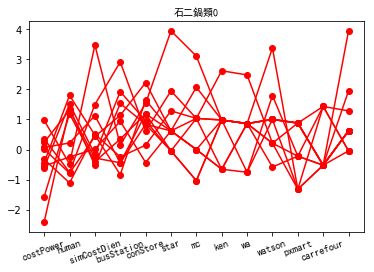

[164, 225, 280, 289, 389, 238, 251, 219, 335, 385, 124]
[59.0, 26.0, 73.0, 75.0, 61.0, 63.0, 41.0, 58.0, 69.0, 70.0, 86.0]
[18637, 38524, 37878, 12352, 43925, 7974, 36372, 40403, 12000, 24395, 15744]
[(164, 59.0, 18637), (225, 26.0, 38524), (280, 73.0, 37878), (289, 75.0, 12352), (389, 61.0, 43925), (238, 63.0, 7974), (251, 41.0, 36372), (219, 58.0, 40403), (335, 69.0, 12000), (385, 70.0, 24395), (124, 86.0, 15744)]


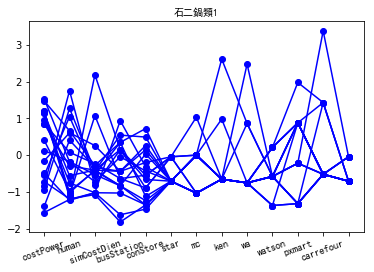

[162, 180, 146, 201, 189, 269, 204, 232, 298, 159, 307, 253, 252, 246, 143, 212, 199, 152, 112]
[86.0, 84.0, 96.0, 90.0, 60.0, 89.0, 71.0, 54.0, 66.0, 44.0, 52.0, 95.0, 90.0, 76.0, 41.0, 59.0, 56.0, 89.0, 84.0]
[12346, 18019, 19420, 8109, 6496, 14771, 19529, 43388, 29217, 26741, 37422, 29884, 9021, 9606, 6767, 34640, 6956, 7533, 22658]
[(162, 86.0, 12346), (180, 84.0, 18019), (146, 96.0, 19420), (201, 90.0, 8109), (189, 60.0, 6496), (269, 89.0, 14771), (204, 71.0, 19529), (232, 54.0, 43388), (298, 66.0, 29217), (159, 44.0, 26741), (307, 52.0, 37422), (253, 95.0, 29884), (252, 90.0, 9021), (246, 76.0, 9606), (143, 41.0, 6767), (212, 59.0, 34640), (199, 56.0, 6956), (152, 89.0, 7533), (112, 84.0, 22658)]


In [70]:
xlabels=[i.replace("_Analyze","").replace("N","") for i in ['costPower_Analyze','Nhuman_Analyze',"NsimCostDien",
        'NbusStation_Analyze','NconStore_Analyze','Nstar_Analyze',
        'Nmc_Analyze', 'Nken_Analyze','Nwa_Analyze',
        'Nwatson_Analyze','Npxmart_Analyze','Ncarrefour_Analyze']]
style = ['o-r', 'o-b', 'o-g','o-y','o-y','o-y','o-y','o-y']
for i in range(k):
    plt.figure()
    aa=[]
    bb=[]
    cc=[]
    abc=[]
    for j,x,a,b,c in zip(y_pred,xx,Y,CY,HY):
        if j==i:
            plt.plot(range(1, len(xx[0])+1), x, style[i],)
            plt.xticks(range(1, len(xx[0])+1), xlabels, rotation = 20,fontproperties='SimHei') #坐标标签
            plt.title(u'石二鍋類%s' %(i),fontproperties='SimHei') #我们计数习惯从1开始
            plt.subplots_adjust(bottom=0.15) #调整底部
            aa.append(a)
            bb.append(b)
            cc.append(c)
            abc.append((a,b,c))
    plt.show()
    print(aa)
    print(bb)
    print(cc)
    print(abc)

In [71]:
len([304, 362, 299, 377, 329, 349, 289, 302, 362, 251, 292])
len([91621, 286210, 34601, 164362, 179901, 116244, 100319, 154917, 111510, 83174, 67165])

11

# Agglomerative分群

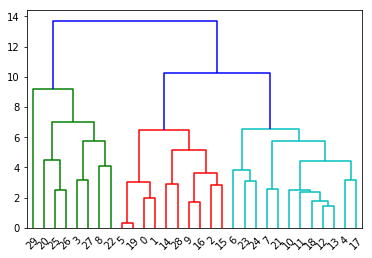

In [72]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage,dendrogram
#這裡使用scipy的層次聚類函數
Z = linkage(xx, method = 'ward', metric = 'euclidean') #譜系聚類圖
P = dendrogram(Z, 0) #畫譜系聚類圖
plt.show()

In [73]:
from sklearn.cluster import AgglomerativeClustering #導入sklearn的層次聚類函數
model = AgglomerativeClustering(n_clusters = k, linkage = 'ward')
model.fit(xx)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=2,
            pooling_func=<function mean at 0x0000000005920AE8>)

In [74]:
model.labels_

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1], dtype=int64)

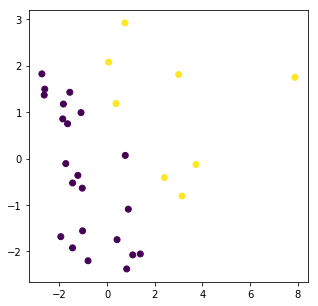

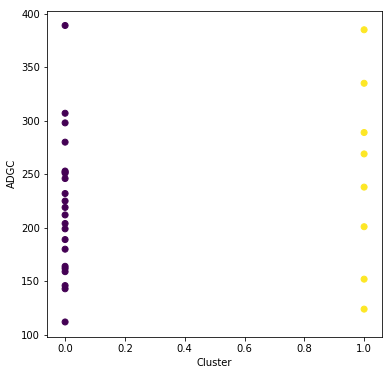

In [75]:
plt.figure(figsize=(5, 5))
# plt.xlabel('costPower')
# plt.ylabel('Nhuman')
# plt.scatter(xx[:, 0], xx[:, 1], c=y_pred) #C是第三維度 已顏色做維度
plt.scatter(reduced_xx.T[0], reduced_xx.T[1], c=model.labels_)
plt.legend()
plt.show()

plt.figure(figsize=(6, 6))
plt.xlabel('Cluster')
plt.ylabel('ADGC')
plt.scatter(model.labels_, Y, c=model.labels_) #C是第三維度 已顏色做維度
plt.show()